<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [195]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [196]:
seeds = pd.read_csv("./data/seeds.csv")

In [197]:
# A:

In [198]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             210 non-null    float64
 1   perimeter        210 non-null    float64
 2   compactness      210 non-null    float64
 3   length           210 non-null    float64
 4   width            210 non-null    float64
 5   asymmetry_coeff  210 non-null    float64
 6   groove_length    210 non-null    float64
 7   species          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [199]:
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

### 2. Do some EDA of relationships between features.

In [200]:
# Plot the Data to see the distributions/relationships


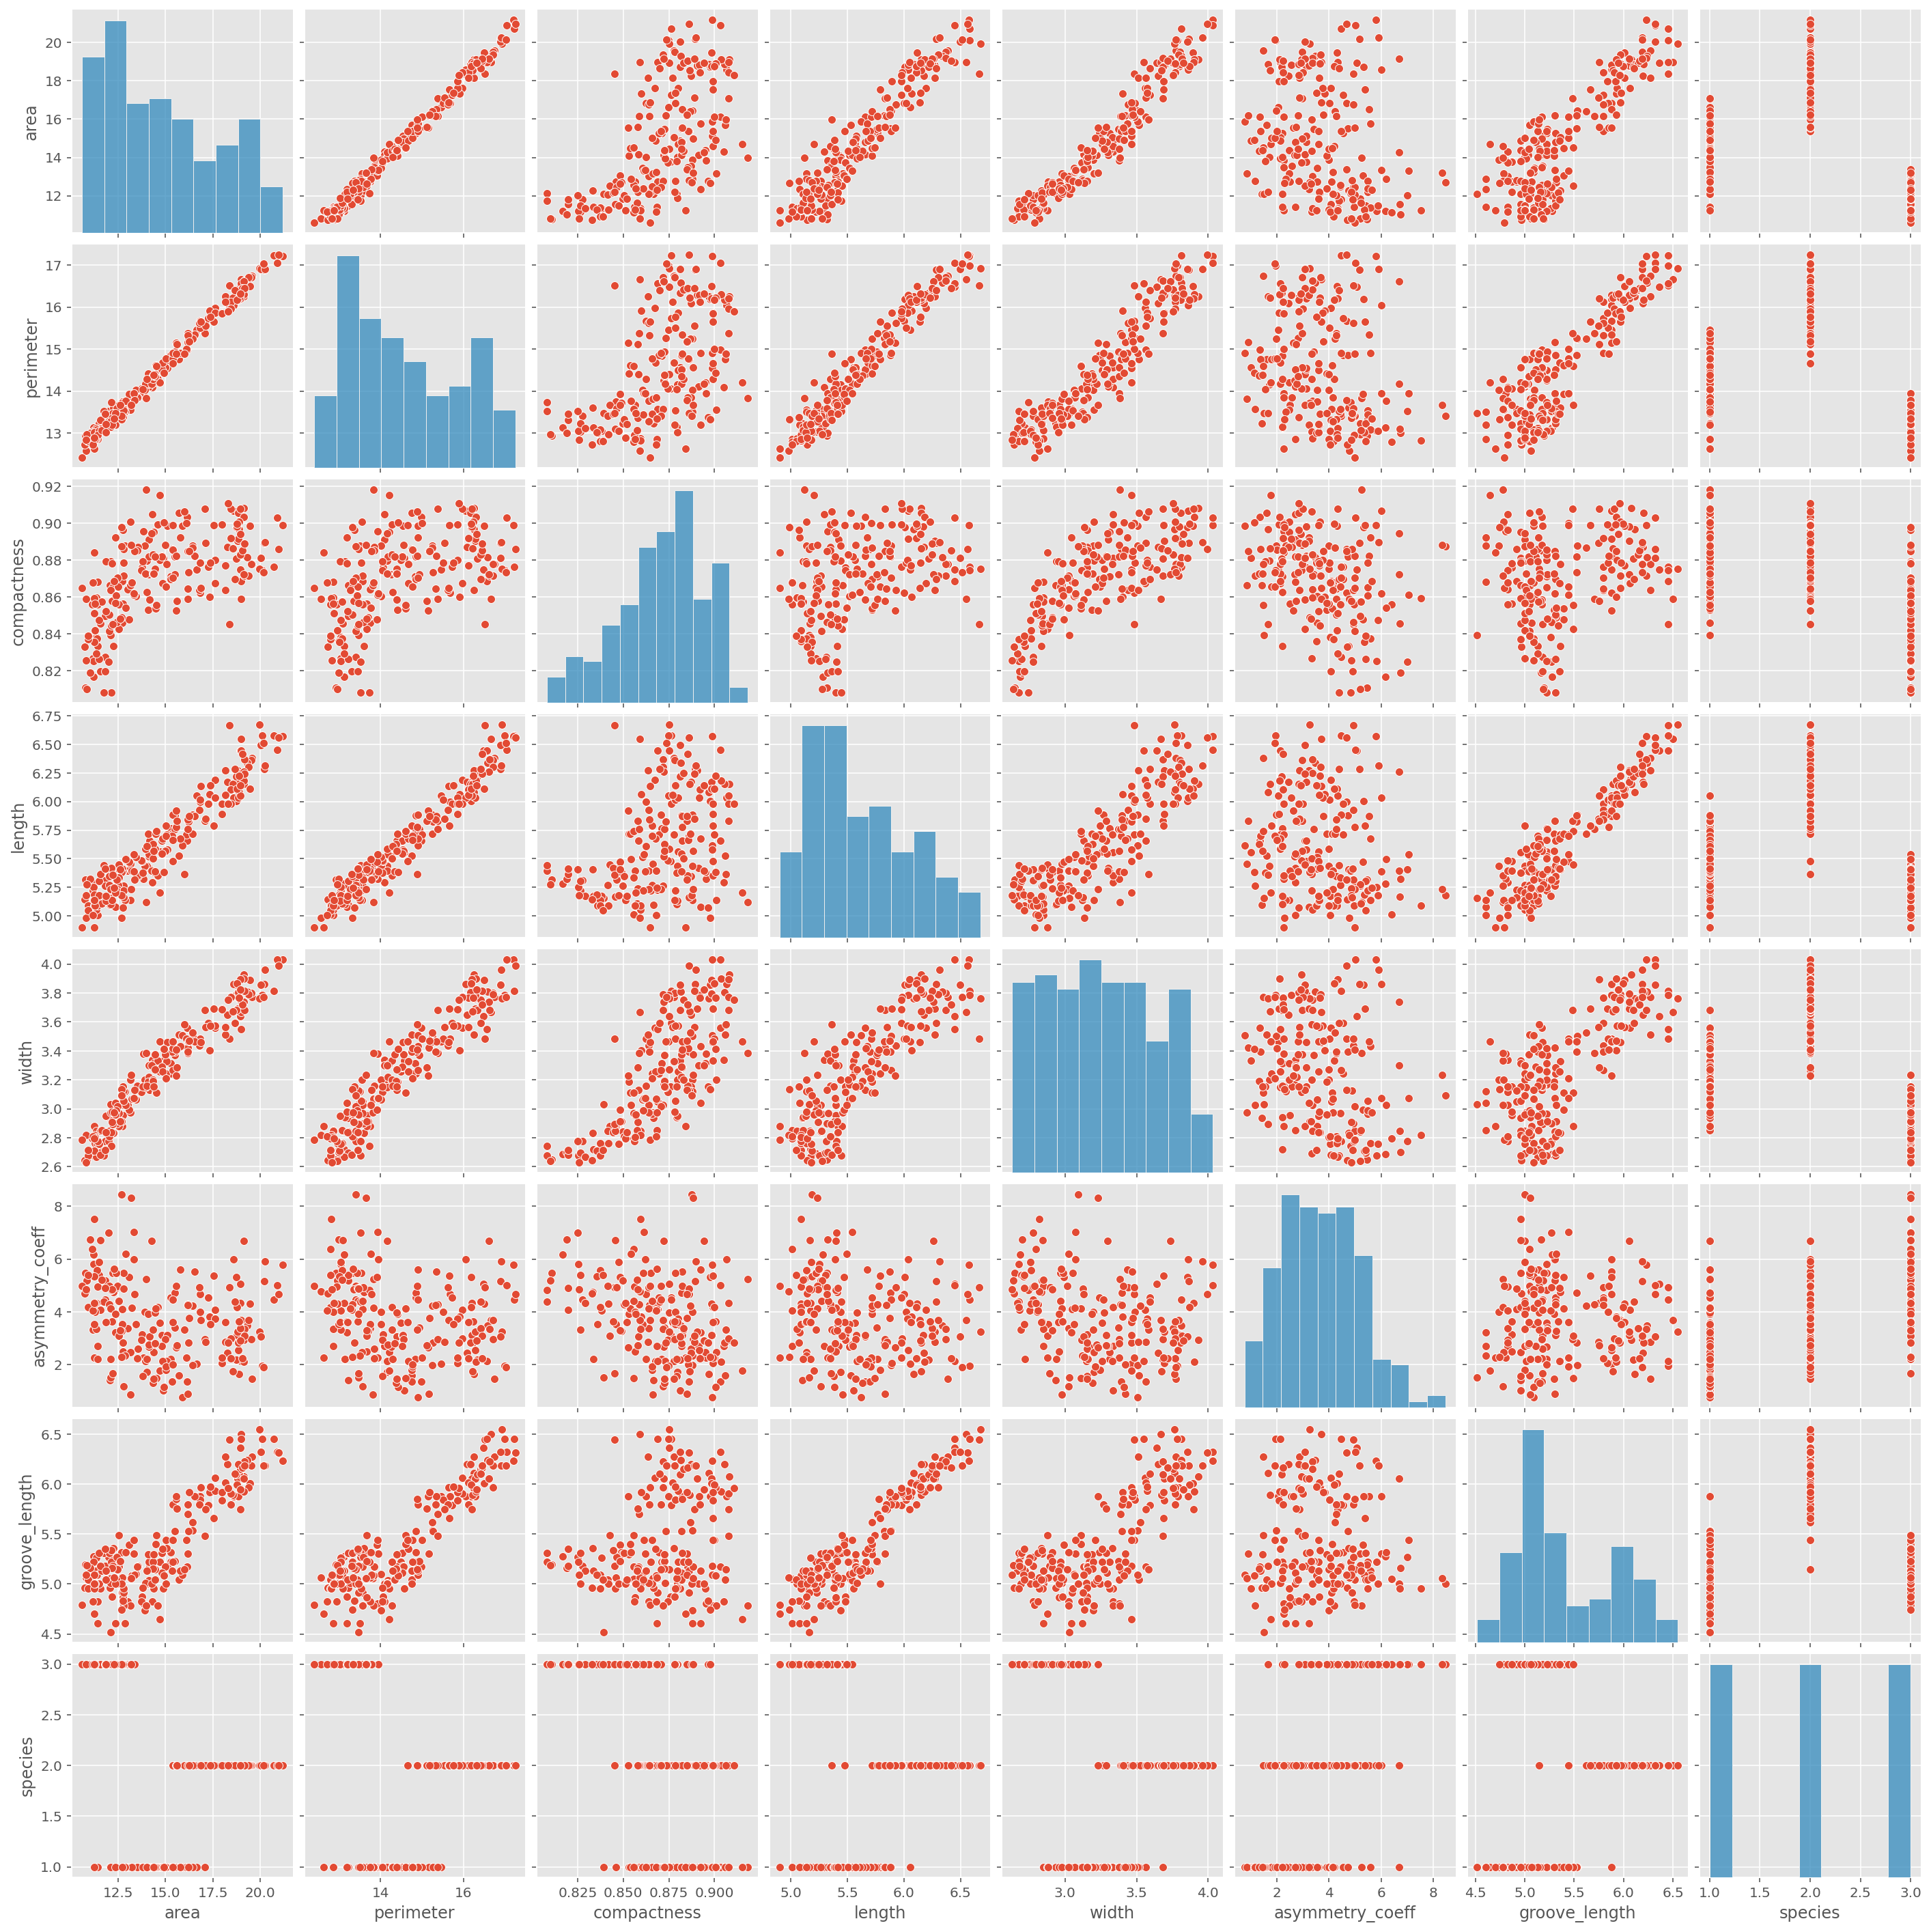

In [201]:
sns.pairplot(seeds)

In [202]:
# Check for nulls

<AxesSubplot:>

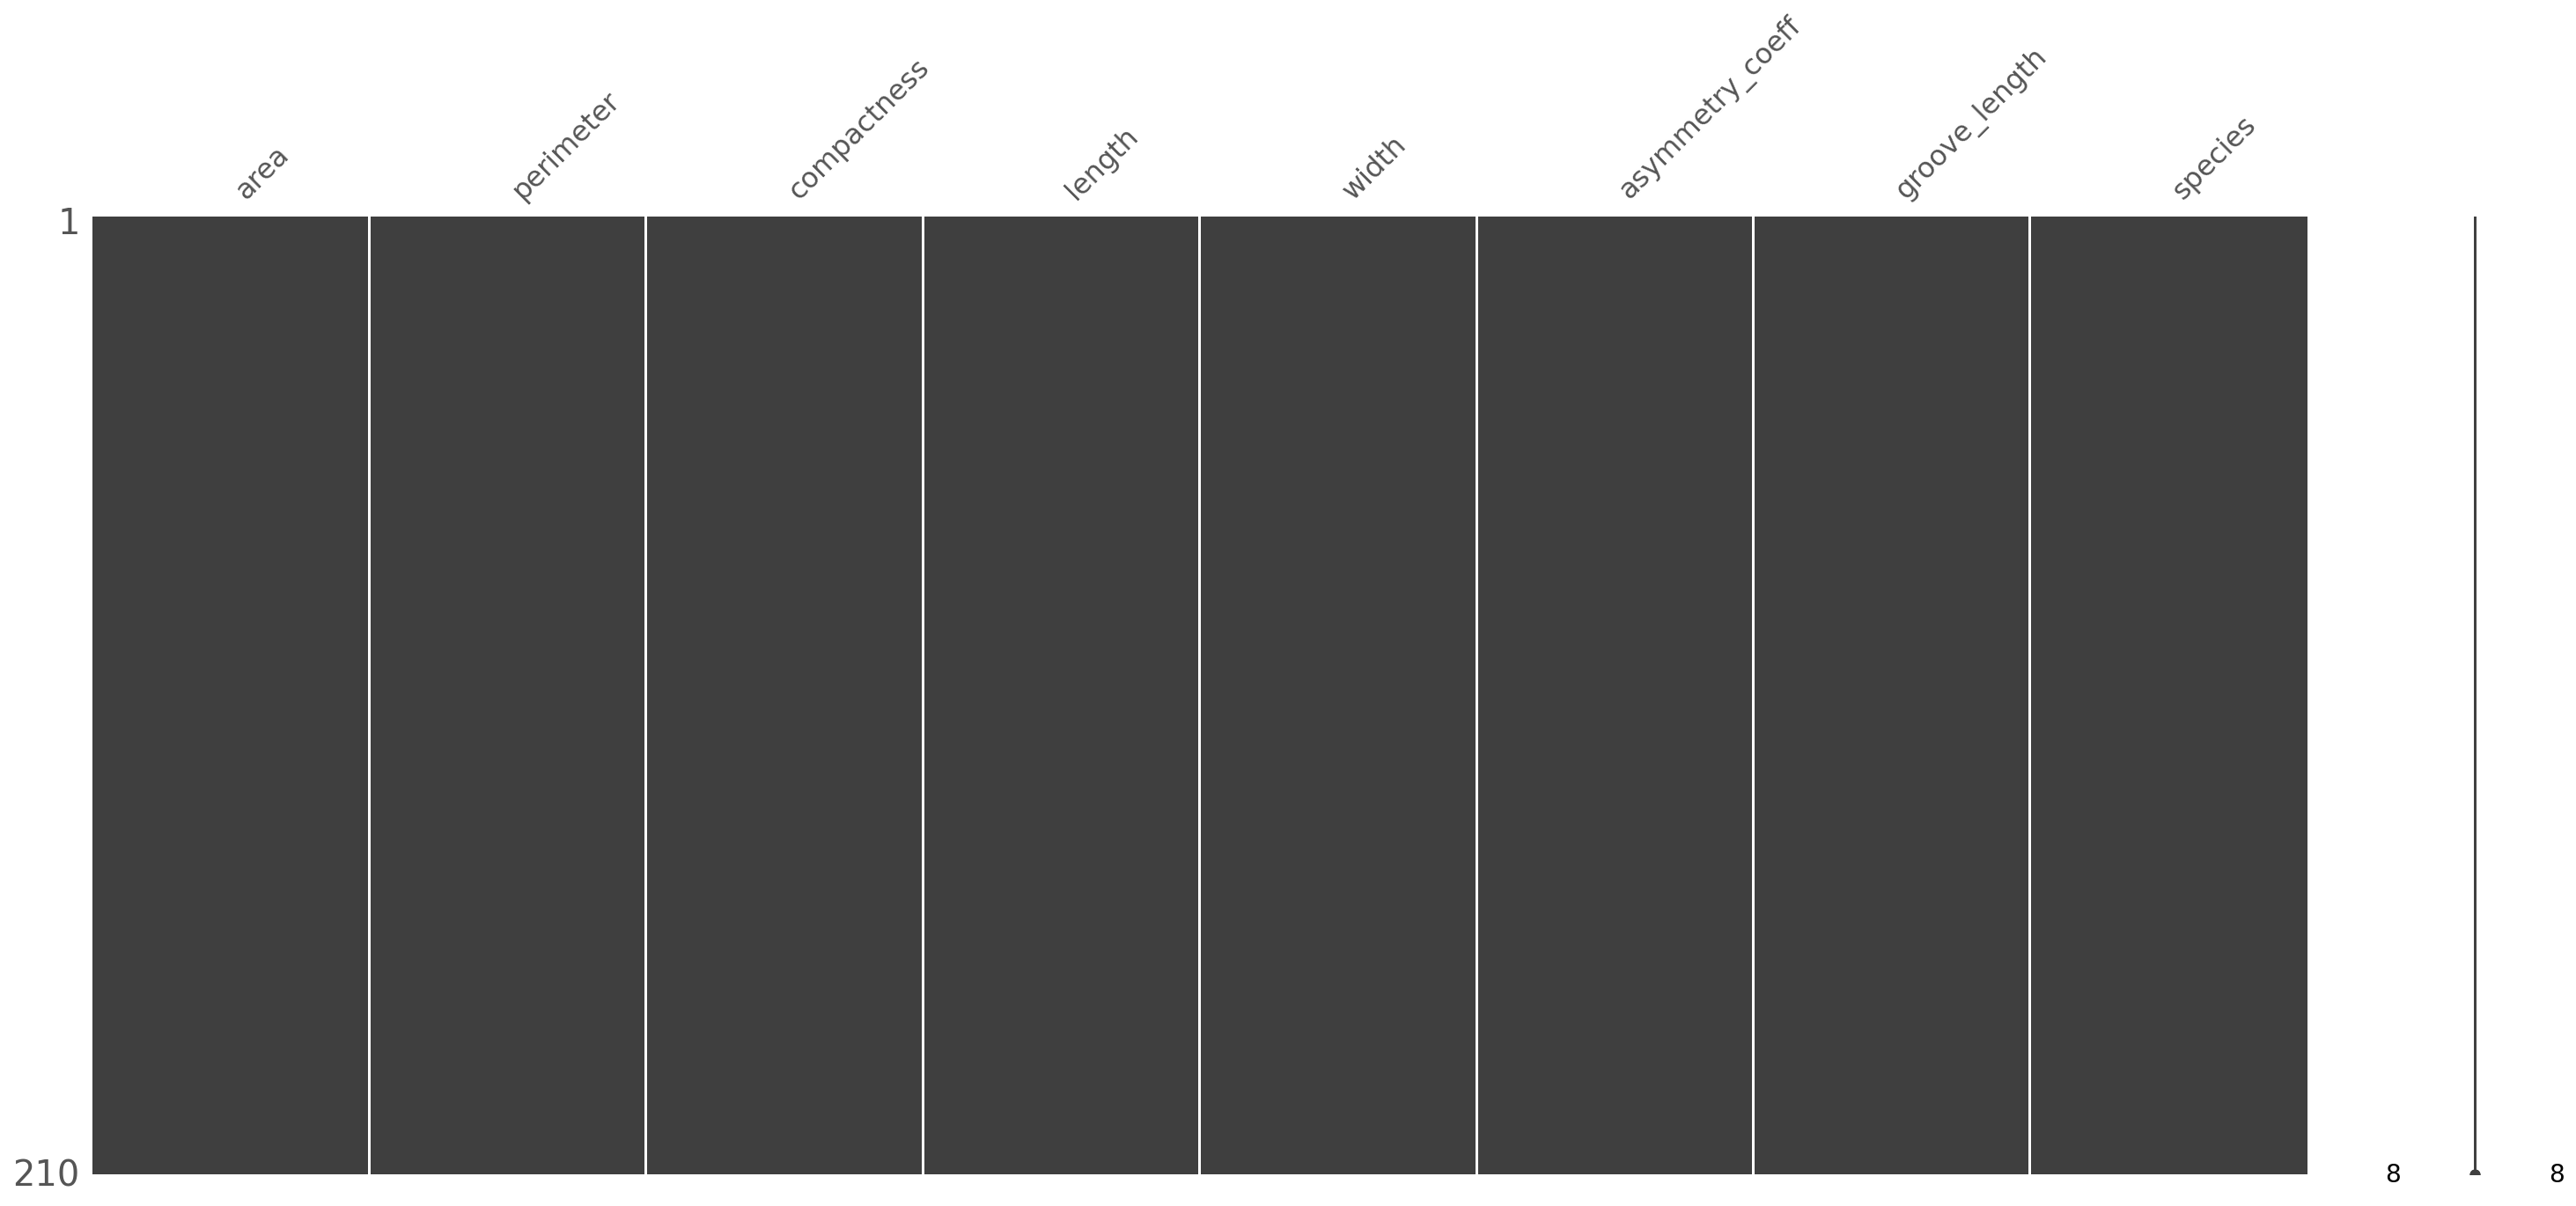

In [203]:
import missingno as msno
msno.matrix(seeds)

In [204]:
# Look at the real species labels.
seeds.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coeff', 'groove_length', 'species'],
      dtype='object')

In [205]:
seeds['species'].value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [206]:
# A:

In [207]:
seeds.head()

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   
3  13.84      13.94       0.8955   5.324  3.379            2.259   
4  16.14      14.99       0.9034   5.658  3.562            1.355   

   groove_length  species  
0          5.220        1  
1          4.956        1  
2          4.825        1  
3          4.805        1  
4          5.175        1

In [208]:
X = seeds.drop('species', axis=1)
y = seeds['species']

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [209]:
from sklearn.cluster import KMeans

In [210]:
km_default = KMeans()

In [211]:
km_default.fit_transform(X)

array([[5.44615886, 4.18714489, 0.61104995, ..., 1.91456541, 5.61867898,
        2.55501372],
       [6.25290003, 4.9822555 , 0.96476509, ..., 3.04356298, 6.72222239,
        3.80304401],
       [4.43099973, 5.45894096, 1.12202285, ..., 1.59341904, 6.57788079,
        3.43591134],
       ...,
       [1.81579768, 8.61639938, 6.63509206, ..., 4.6611928 , 7.92671833,
        6.10189903],
       [3.16456683, 8.03864918, 3.72192644, ..., 3.34649554, 8.80216102,
        5.70690672],
       [1.07026629, 8.04895636, 4.65423029, ..., 3.24139698, 8.20654628,
        5.47442528]])

### 5. Get the labels and centroids for out first clustering model.

In [212]:
# A:

In [213]:
km_default.labels_

array([2, 2, 2, 2, 2, 2, 5, 2, 7, 2, 5, 2, 5, 4, 4, 5, 5, 2, 2, 4, 5, 2,
       2, 4, 2, 2, 4, 4, 2, 4, 2, 5, 5, 2, 2, 2, 7, 7, 5, 0, 4, 4, 4, 5,
       5, 2, 2, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 4, 7, 7, 7, 1, 7, 7, 7, 6, 6, 7, 7, 6, 6, 1, 1, 1, 1, 1,
       6, 6, 1, 1, 1, 6, 6, 7, 1, 1, 1, 1, 7, 1, 6, 1, 1, 1, 1, 7, 1, 1,
       1, 1, 1, 6, 6, 1, 6, 1, 1, 1, 6, 1, 7, 1, 5, 6, 6, 1, 1, 7, 1, 1,
       5, 7, 5, 5, 7, 2, 2, 7, 0, 0, 0, 3, 3, 3, 4, 3, 4, 3, 3, 0, 3, 4,
       3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 0, 4, 3, 4, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 0, 5,
       4, 4, 3, 4, 3, 0, 4, 4, 3, 0, 4, 0], dtype=int32)

In [214]:
km_default.cluster_centers_

array([[12.48857143, 13.49428571,  0.8605    ,  5.29835714,  2.98235714,
         6.67492857,  5.13792857],
       [18.95454545, 16.38878788,  0.8868    ,  6.24748485,  3.74469697,
         2.72354545,  6.11945455],
       [14.838     , 14.53771429,  0.88179143,  5.58622857,  3.30708571,
         1.95654857,  5.16902857],
       [11.59195122, 13.14780488,  0.84224634,  5.21185366,  2.79336585,
         4.82519512,  5.11607317],
       [12.49787879, 13.46      ,  0.86622727,  5.24430303,  2.98090909,
         2.88242424,  4.9650303 ],
       [14.814     , 14.523     ,  0.88246   ,  5.5864    ,  3.30585   ,
         4.04705   ,  5.23845   ],
       [19.58333333, 16.646     ,  0.88772667,  6.31586667,  3.83506667,
         5.08153333,  6.1444    ],
       [16.87263158, 15.55210526,  0.87646842,  5.94294737,  3.51      ,
         3.95368421,  5.80873684]])

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [215]:
from sklearn.metrics import silhouette_score

# A:

In [216]:
silhouette_score(X, km_default.labels_)

0.3466862504310692

In [217]:
df_km_default = X.join(pd.Series(km_default.labels_, name='k_default labels'))

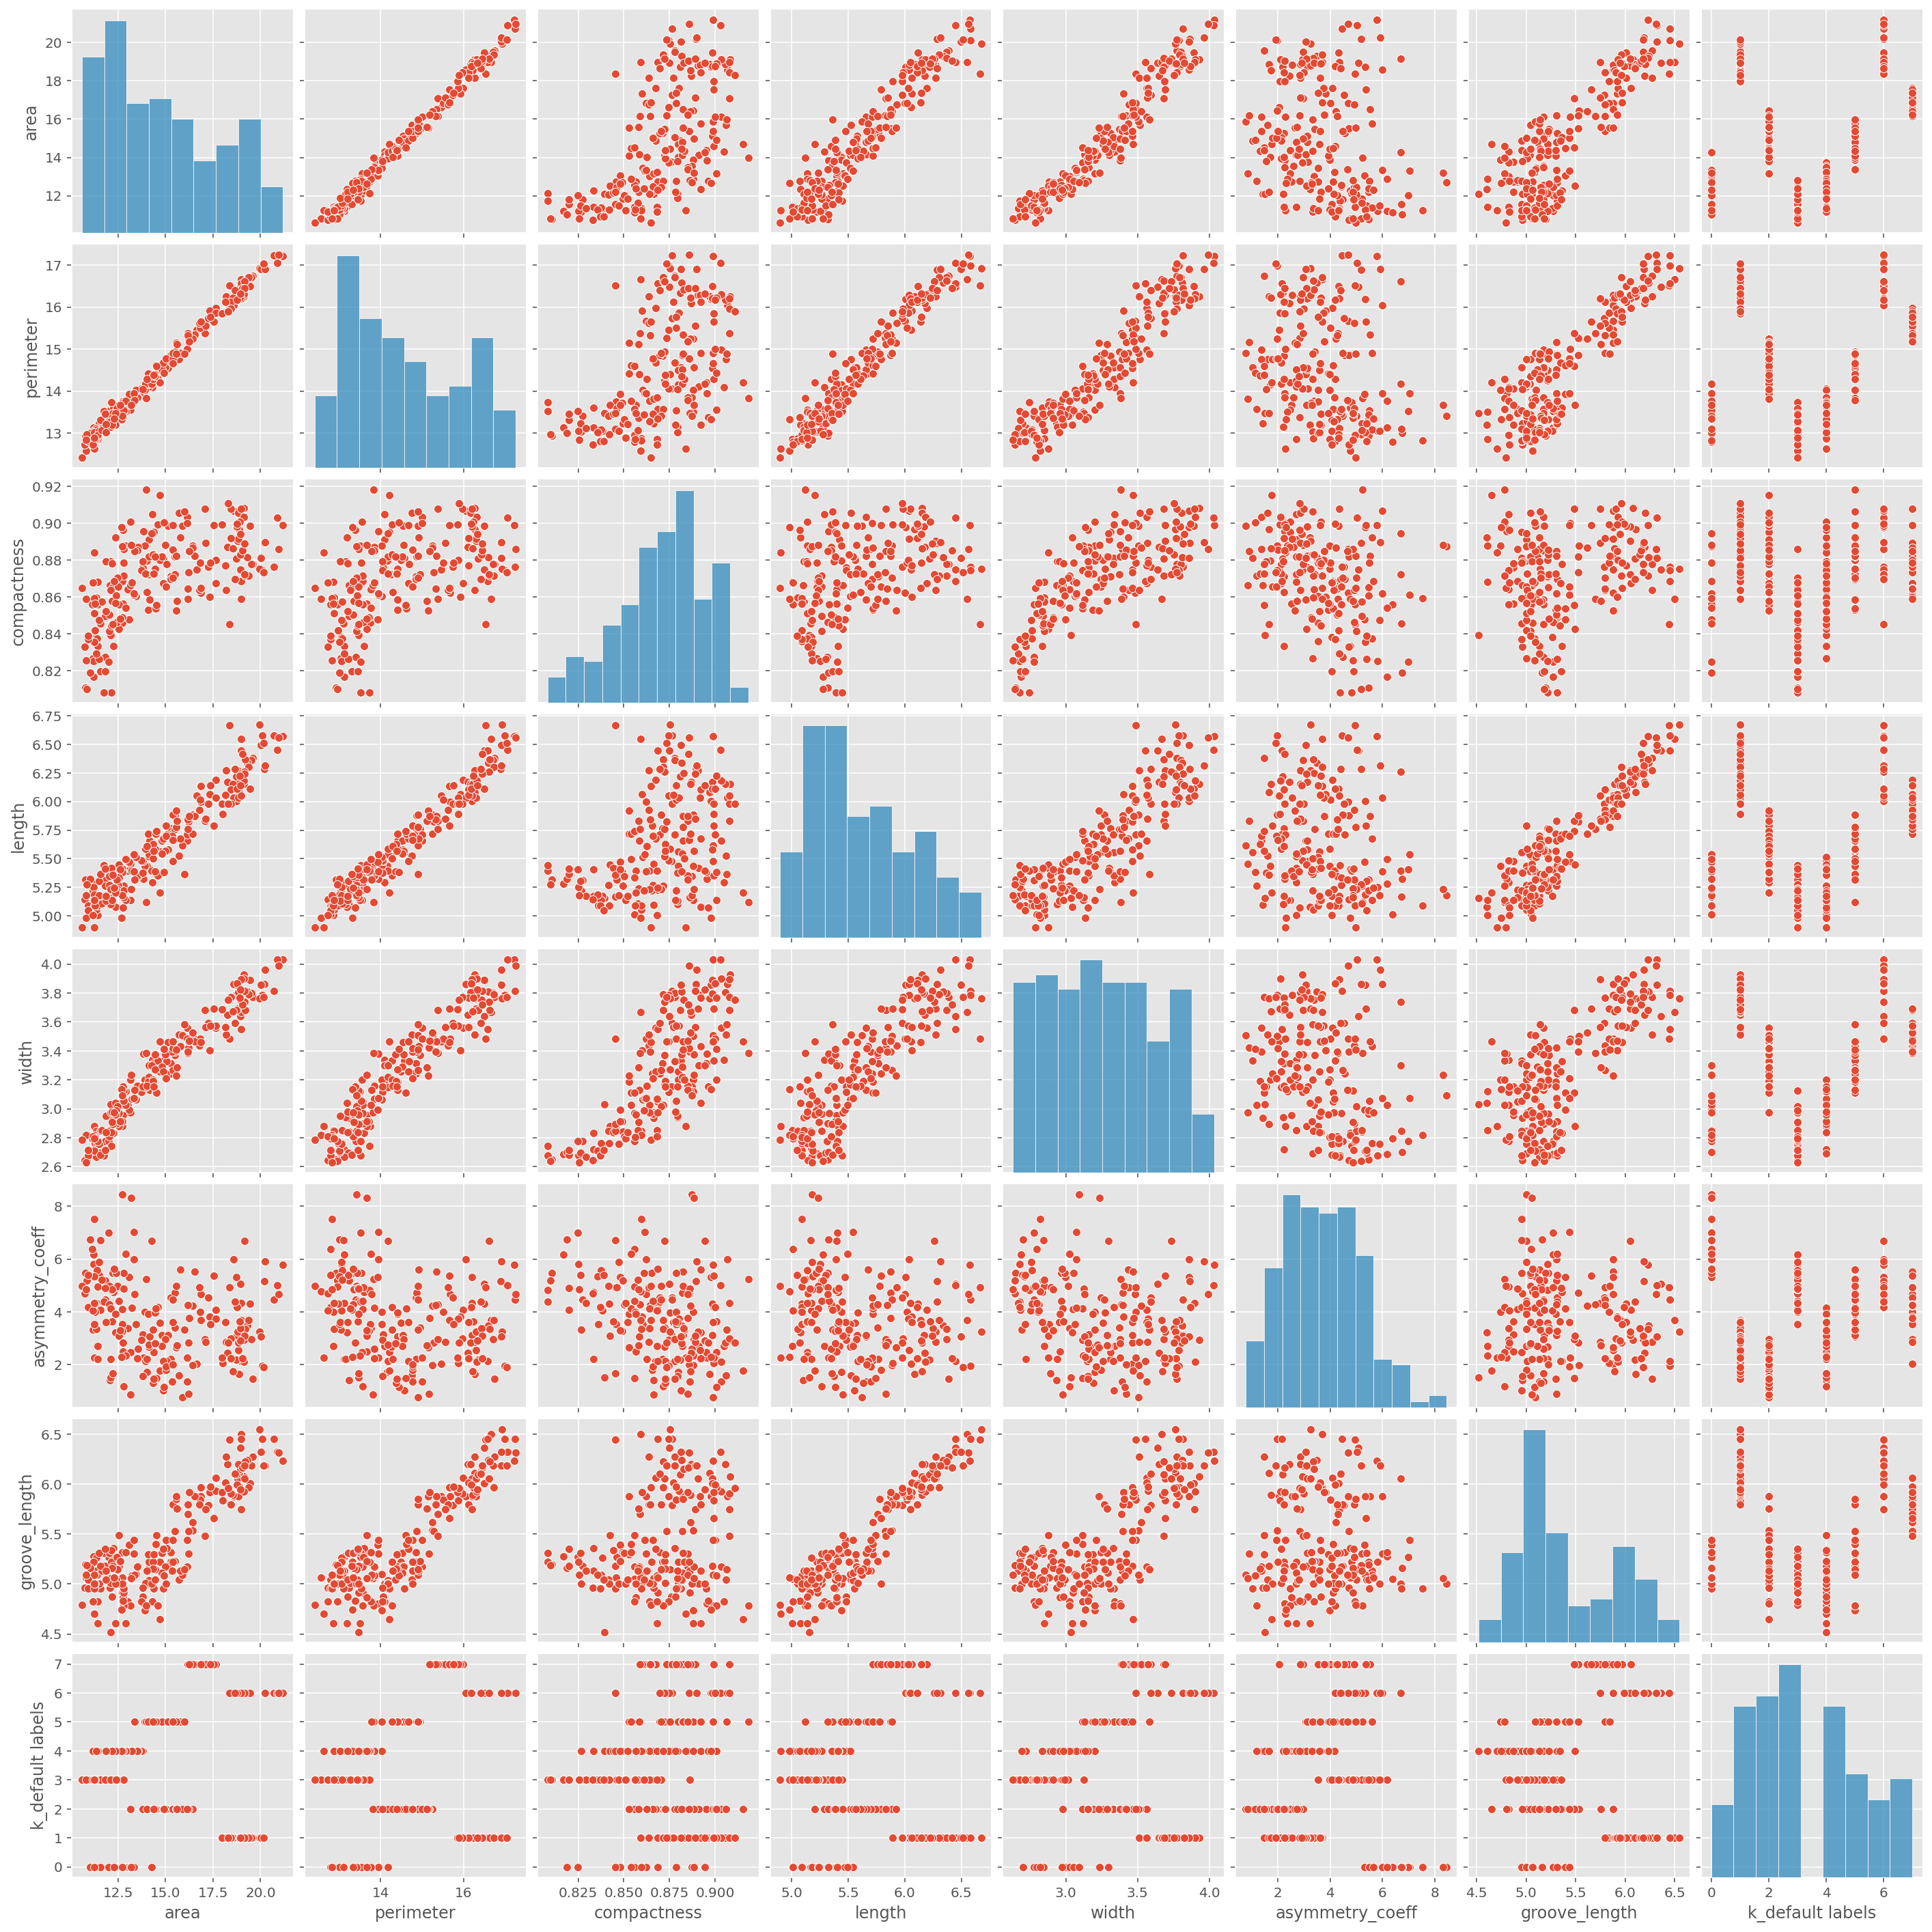

In [218]:
sns.pairplot(data=df_km_default)

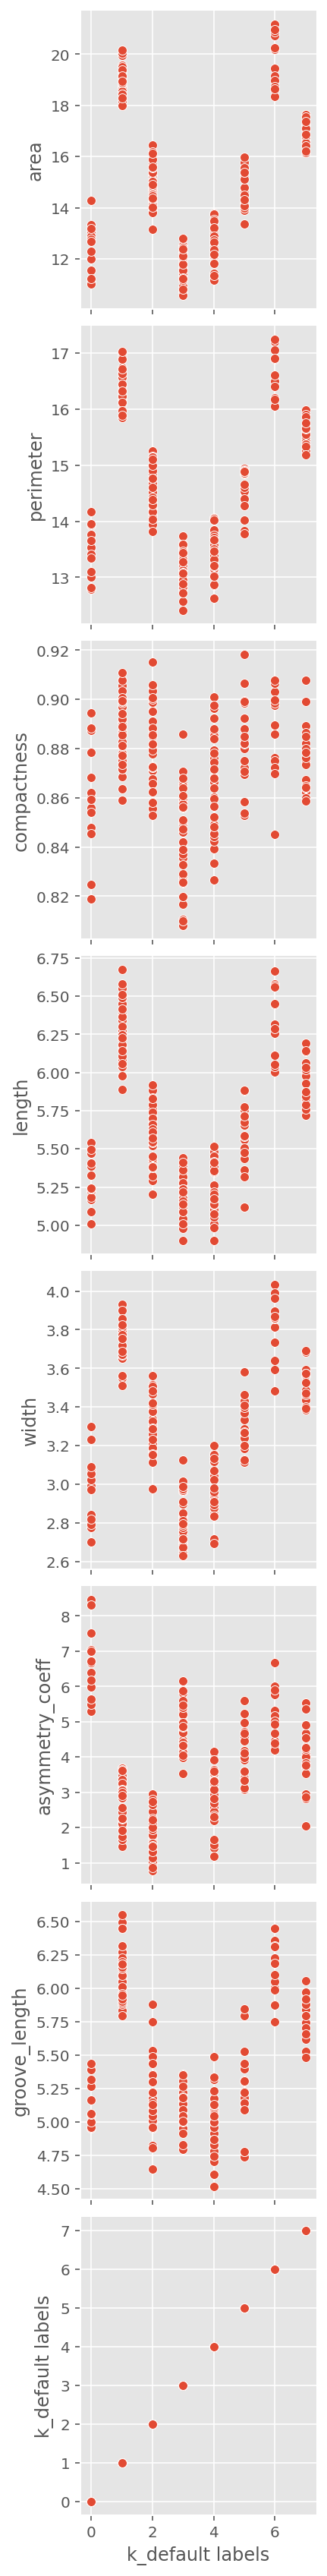

In [219]:
sns.pairplot(data=df_km_default, x_vars=['k_default labels'], diag_kind=None, height=3)

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [220]:
import random

rand_1, rand_2 = random.randint(1,25), random.randint(1,25)

In [221]:
rand_1, rand_2

(10, 25)

In [222]:
# A:

In [223]:
counter = 1
km_list = []
km_df_list = []
for i in [rand_1, rand_2]:
    km = KMeans(n_clusters=i)
    km.fit_transform(X)
    km_list.append(km)
    print(silhouette_score(X, km.labels_))
    km_df_list.append(X.join(pd.Series(km.labels_, name=f'k_{counter} labels')))
    counter += 1

0.3416351804592936
0.3230704146172392


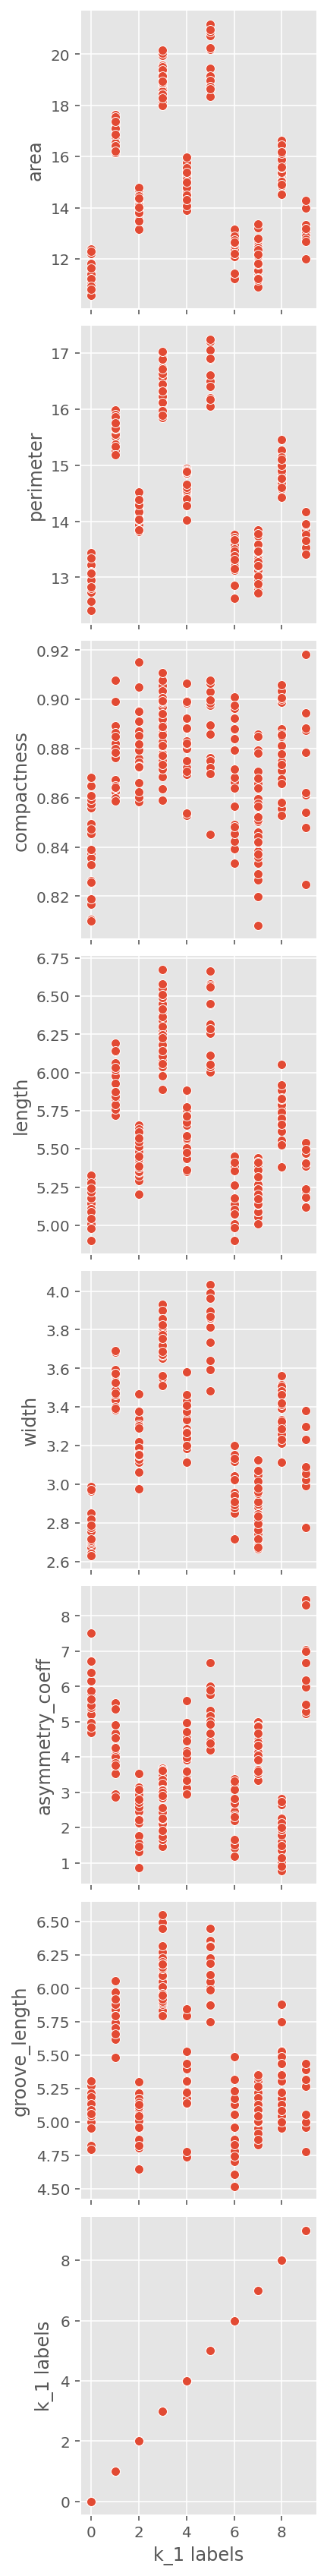

In [224]:
sns.pairplot(data=km_df_list[0], x_vars=[f'k_{1} labels'], diag_kind=None, height=3)


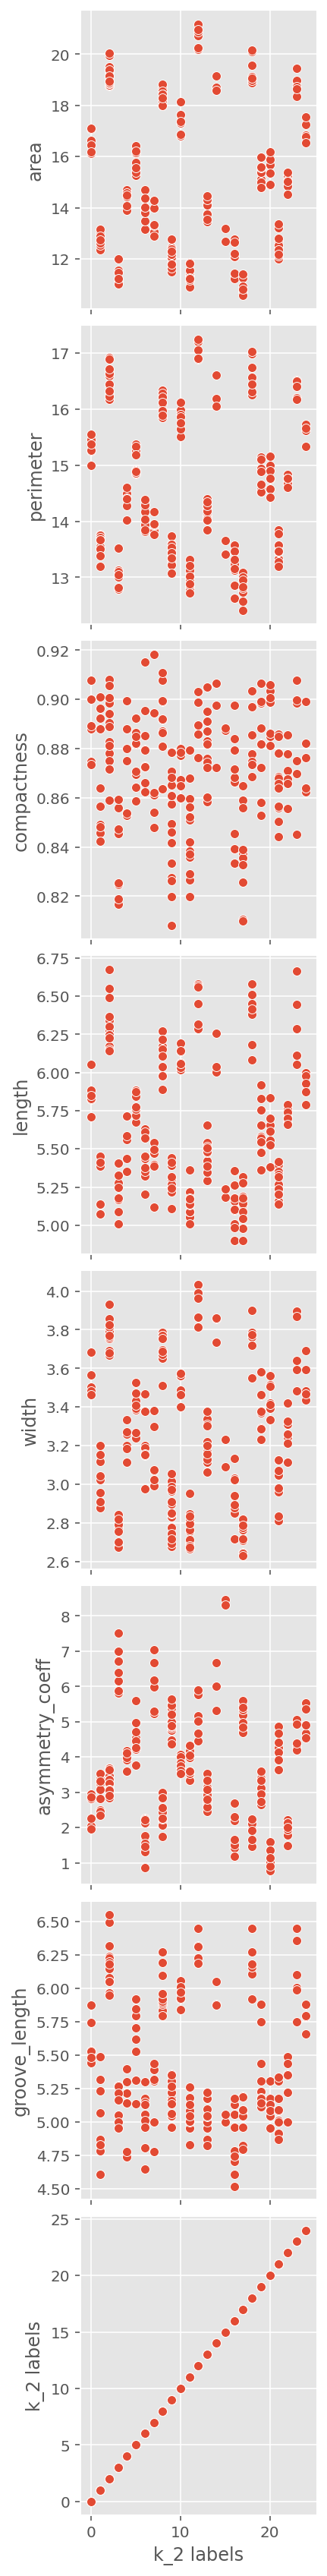

In [225]:
sns.pairplot(data=km_df_list[1], x_vars=[f'k_{2} labels'], diag_kind=None, height=3)


### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [226]:
# A:

In [227]:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [242]:
np.array(MinMaxScaler(X))

array(MinMaxScaler(feature_range=      area  perimeter  compactness  length  width  asymmetry_coeff  \
0    15.26      14.84       0.8710   5.763  3.312            2.221   
1    14.88      14.57       0.8811   5.554  3.333            1.018   
2    14.29      14.09       0.9050   5.291  3.337            2.699   
3    13.84      13.94       0.8955   5.324  3.379            2.259   
4    16.14      14.99       0.9034   5.658  3.562            1.355   
..     ...        ...          ...     ...    ...              ...   
205  12.19      13.20       0.8783   5.137  2.981            3.631   
206  11.23      12.88       0.8511   5.140  2.795            4.325   
207  13.20      13.66       0.8883   5.236  3.232            8.315   
208  11.84      13.21       0.8521   5.175  2.836            3.598   
209  12.30      13.34       0.8684   5.243  2.974            5.637   

     groove_length  
0            5.220  
1            4.956  
2            4.825  
3            4.805  
4            5.175  


In [248]:
def find_best_n_kmeans(df, n=8):
    '''
    Pass DataFrame without the classifications
    Pass n as upper bound of what you want to search for. If none is passed the default is 8, same ad KMeans
    
    This optimizes n for the highest sihouette score. Best = 1, Worst = -1
    Returns best n
    '''
    km_objects = []
    silhouettes = []
    silhouettes_n = []
    silhouettes_ss = []
    silhouettes_mms = []
    
    ss = StandardScaler()
    mms = MinMaxScaler()
    
    for i in range(2, n+1):
        km = KMeans(n_clusters=i)
        km_fit = km.fit_transform(df)
        km_objects.append(km)
        silhouettes.append(silhouette_score(X, km.labels_))
        silhouettes_n.append(silhouette_score(normalize(X), km.labels_))
        silhouettes_ss.append(silhouette_score(ss.fit_transform(X), km.labels_))
        silhouettes_mms.append(silhouette_score(mms.fit_transform(X), km.labels_))
    
    return km_objects, pd.DataFrame([silhouettes, silhouettes_n, silhouettes_ss, silhouettes_mms], columns=list(range(2, n+1)), index=['None', 'Normalize', 'SScaler', 'MinMax'])

In [249]:
objects, scores = find_best_n_kmeans(X, 10)

In [250]:
scores

2         3         4         5         6         7   \
None       0.518287  0.471934  0.395360  0.361323  0.364895  0.352465   
Normalize  0.284643  0.330886  0.282855  0.257549  0.295030  0.261895   
SScaler    0.453836  0.383092  0.291750  0.247418  0.243797  0.228334   
MinMax     0.492751  0.404908  0.308144  0.252700  0.229677  0.220136   

                 8         9         10  
None       0.362825  0.355801  0.338843  
Normalize  0.274606  0.231653  0.199196  
SScaler    0.218899  0.200200  0.174730  
MinMax     0.201688  0.194263  0.172944

Text(0.5, 0, 'Silhouette Score | Higher is Better')

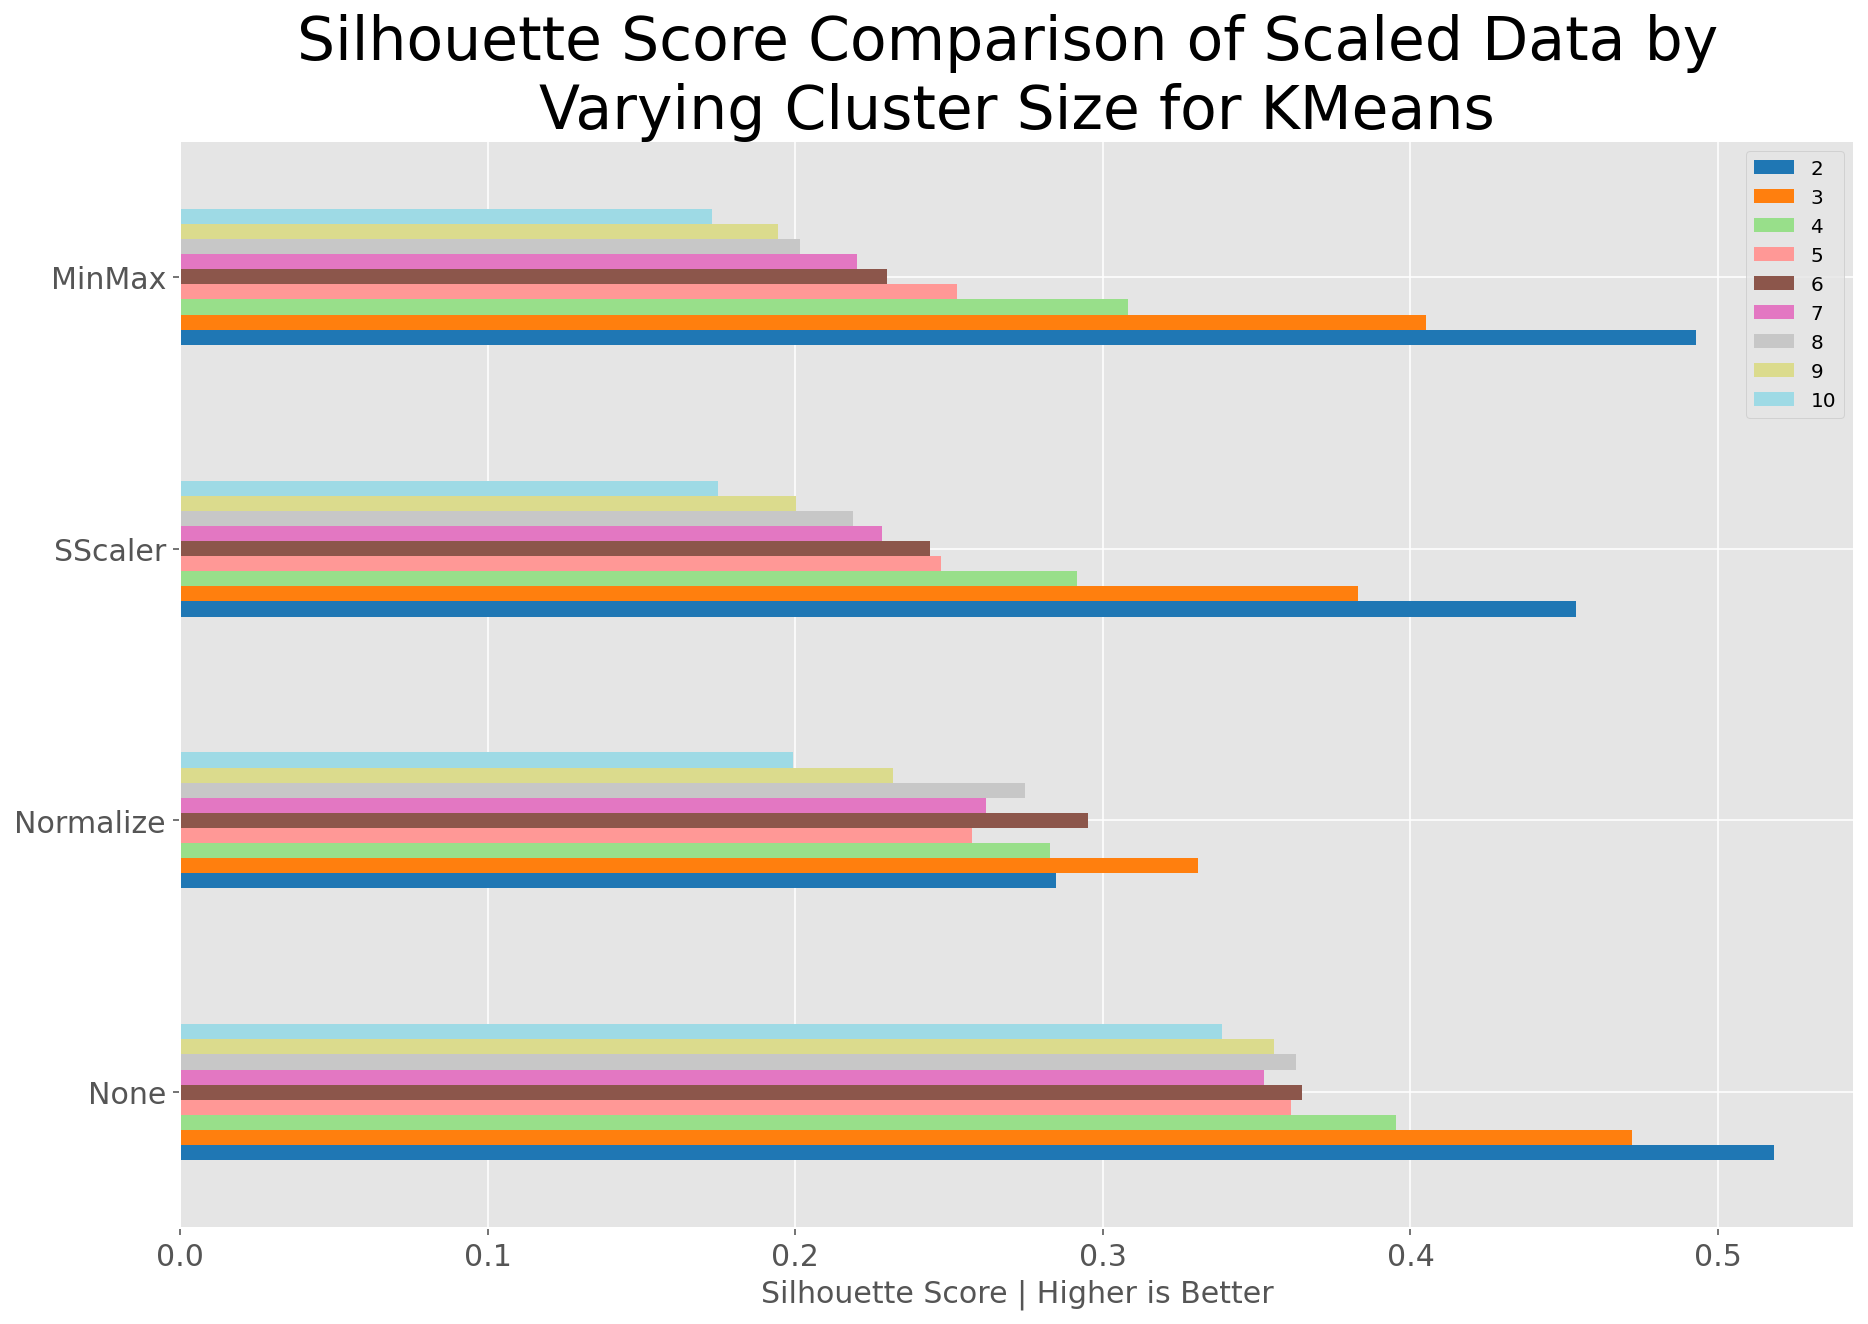

In [308]:
scores.plot(kind='barh', figsize=(15, 10), fontsize=15, colormap='tab20')
plt.title('Silhouette Score Comparison of Scaled Data by \nVarying Cluster Size for KMeans', fontsize=30)
plt.xlabel('Silhouette Score | Higher is Better', fontsize=15)

In [ ]:
# Despite knowing that we have 3 classes, our KMeans suggests that there are only two classes
# Honestly, I am kind of confused

In [258]:
# This is the baseline truth

In [131]:
silhouette_score(X, y)

0.4145082948852802

In [132]:
# remember there are 3 classes

In [133]:
y.value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

In [134]:
# According to the function the best is when n= 2

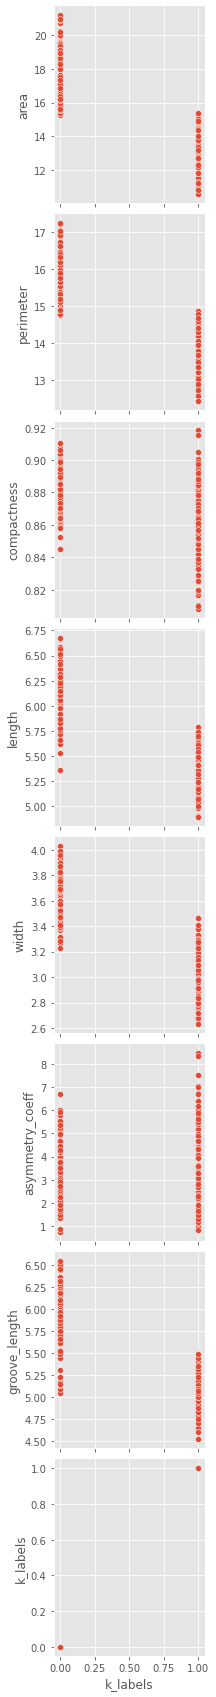

In [137]:
sns.pairplot(data=X.join(pd.Series(objects[0].labels_, name='k_labels')), x_vars=['k_labels'], diag_kind=None, height=3)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [309]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [310]:
nhl = pd.read_csv('./data/nhl.csv')

In [311]:
# A:

In [312]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    90 non-null     object 
 1   PTS     90 non-null     int64  
 2   Rank    90 non-null     int64  
 3   TOI     90 non-null     object 
 4   GF      90 non-null     int64  
 5   GA      90 non-null     int64  
 6   GF60    90 non-null     float64
 7   GA60    90 non-null     float64
 8   GF%     90 non-null     float64
 9   SF      90 non-null     int64  
 10  SA      90 non-null     int64  
 11  SF60    90 non-null     float64
 12  SA60    90 non-null     float64
 13  SF%     90 non-null     float64
 14  FF      90 non-null     int64  
 15  FA      90 non-null     int64  
 16  FF60    90 non-null     float64
 17  FA60    90 non-null     float64
 18  FF%     90 non-null     float64
 19  CF      90 non-null     int64  
 20  CA      90 non-null     int64  
 21  CF60    90 non-null     float64
 22  CA60

In [313]:
nhl.head()

Team  PTS  Rank         TOI   GF  GA  GF60  GA60   GF%    SF  ...  \
0  Washington10  121     1  2001:52:00  115  73  3.45  2.19  61.2  1112  ...   
1   Vancouver11  117     1  2056:14:00   94  72  2.74  2.10  56.6  1143  ...   
2    San Jose10  113     1  1929:54:00   90  68  2.80  2.11  57.0  1065  ...   
3     Chicago10  112     1  2020:23:00  104  83  3.09  2.46  55.6  1186  ...   
4   Vancouver12  111     1  2052:02:00   86  74  2.51  2.16  53.8  1078  ...   

    FF%    CF    CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  51.3  2138  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  53.1  2144  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  50.9  1985  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  
3  58.1  2093  1572  62.2  46.7  57.1   8.77  90.44   992   966  
4  51.0  2085  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  

[5 rows x 28 columns]

In [314]:
# Note: TOI means 'Time on Ice' interperted as Days:Hours:Minutes-

In [315]:
test = nhl['TOI']

In [316]:
test.str.split(':').apply(lambda a : sum([int(a[0]) * 24 * 60, int(a[1]) * 60, int(a[2])]))

0     2884560
1     2961480
2     2781000
3     2910180
4     2955000
       ...   
85    3103860
86    2932200
87    3067980
88    2858160
89    2730300
Name: TOI, Length: 90, dtype: int64

In [317]:
# okay the converstion from Days:Hours:minutes to sum(minutes worked, let's implement it)

In [321]:
nhl['TOI'] = nhl['TOI'].str.split(':').apply(lambda a : sum([int(a[0]) * 24 * 60, int(a[1]) * 60, int(a[2])])).copy()

In [322]:
nhl.head()

Team  PTS  Rank      TOI   GF  GA  GF60  GA60   GF%    SF  ...  \
0  Washington10  121     1  2884560  115  73  3.45  2.19  61.2  1112  ...   
1   Vancouver11  117     1  2961480   94  72  2.74  2.10  56.6  1143  ...   
2    San Jose10  113     1  2781000   90  68  2.80  2.11  57.0  1065  ...   
3     Chicago10  112     1  2910180  104  83  3.09  2.46  55.6  1186  ...   
4   Vancouver12  111     1  2955000   86  74  2.51  2.16  53.8  1078  ...   

    FF%    CF    CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  51.3  2138  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  53.1  2144  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  50.9  1985  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  
3  58.1  2093  1572  62.2  46.7  57.1   8.77  90.44   992   966  
4  51.0  2085  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  

[5 rows x 28 columns]

In [323]:
nhl.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [324]:
# All data converted into int64 !

In [325]:
# The data looks good so far. I don't see anything we would need to watch out for. 

In [326]:
# Let's set up a baseline though

In [327]:
nhl['Rank'].value_counts(normalize=True)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

In [328]:
# We have 3 classifications which are equally spread out

### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [329]:
# A:

In [330]:
X = nhl.drop(['Rank', 'Team'], axis=1)
y = nhl['Rank']

In [331]:
X.head()

PTS      TOI   GF  GA  GF60  GA60   GF%    SF    SA  SF60  ...   FF%    CF  \
0  121  2884560  115  73  3.45  2.19  61.2  1112  1047  33.3  ...  51.3  2138   
1  117  2961480   94  72  2.74  2.10  56.6  1143  1053  33.4  ...  53.1  2144   
2  113  2781000   90  68  2.80  2.11  57.0  1065  1039  33.1  ...  50.9  1985   
3  112  2910180  104  83  3.09  2.46  55.6  1186   868  35.2  ...  58.1  2093   
4  111  2955000   86  74  2.51  2.16  53.8  1078  1115  31.5  ...  51.0  2085   

     CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  
3  1572  62.2  46.7  57.1   8.77  90.44   992   966  
4  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  

[5 rows x 26 columns]

In [332]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Rank, dtype: int64

### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

In [335]:
# I DO NOT UNDERSTAND HOCKEY
# Here is a very useful data dictonary, but it doesn't cover all the data
'''
https://www.hockey-reference.com/leagues/NHL_2020_skaters-time-on-ice.html

Also view explanations by holding mouse over column headers
Rk -- Rank
Shift -- Avg. Shift Length/Gm
Scoring
GP -- Games Played
Even Strength
TOI -- Avg. Time on Ice/Gm at Even Strength
CF% Rel -- Relative Corsi For % at Even Strength
GF/60 -- On-Ice Goals For/60 Minutes at Even Strength
GA/60 -- On-Ice Goals Against/60 Minutes at Even Strength
Power Play
TOI -- Avg. Time on Ice/Gm while on Power Play
CF% Rel -- Relative Corsi For % on the Power Play
GF/60 -- On-Ice Goals For/60 Minutes on the Power Play
GA/60 -- On-Ice Goals Against/60 Minutes on the Power Play
Short Handed
TOI -- Avg. Time on Ice/Gm while Short Handed
CF% Rel -- Relative Corsi For % while Short Handed
''';

In [5]:
# A:

In [336]:
X.columns

Index(['PTS', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF', 'SA', 'SF60',
       'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF', 'CA', 'CF60',
       'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

Text(0.5, 1.0, 'GA60 vs Sh%')

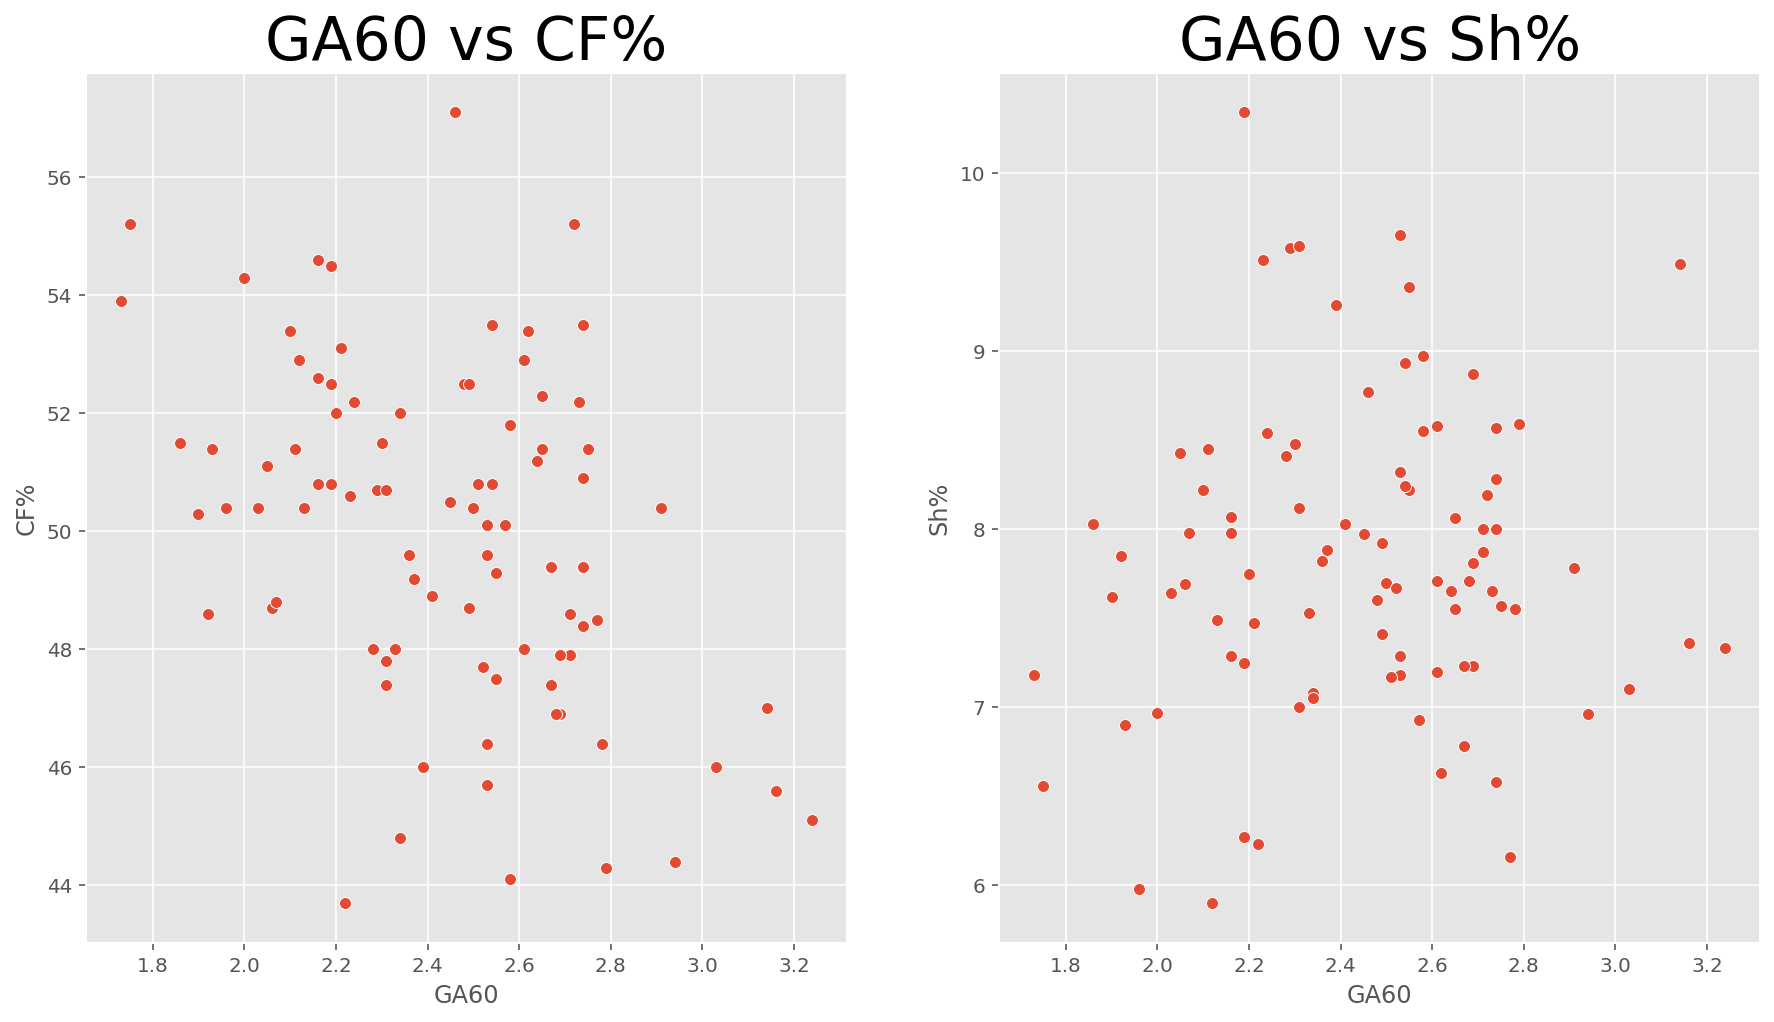

In [343]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.scatterplot(data=X, x='GA60', y='CF%')
plt.title('GA60 vs CF%', fontsize=30)
plt.subplot(1,2,2,)
sns.scatterplot(data=X, x='GA60', y='Sh%')
plt.title('GA60 vs Sh%', fontsize=30)

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [6]:
# A:

In [344]:
ss = StandardScaler()

In [345]:
X_ss = ss.fit_transform(X)

In [352]:
X_ss = pd.DataFrame(X_ss, index=X.index, columns=X.columns)

Text(0.5, 1.0, 'GA60 vs Sh% | Standard Scaler')

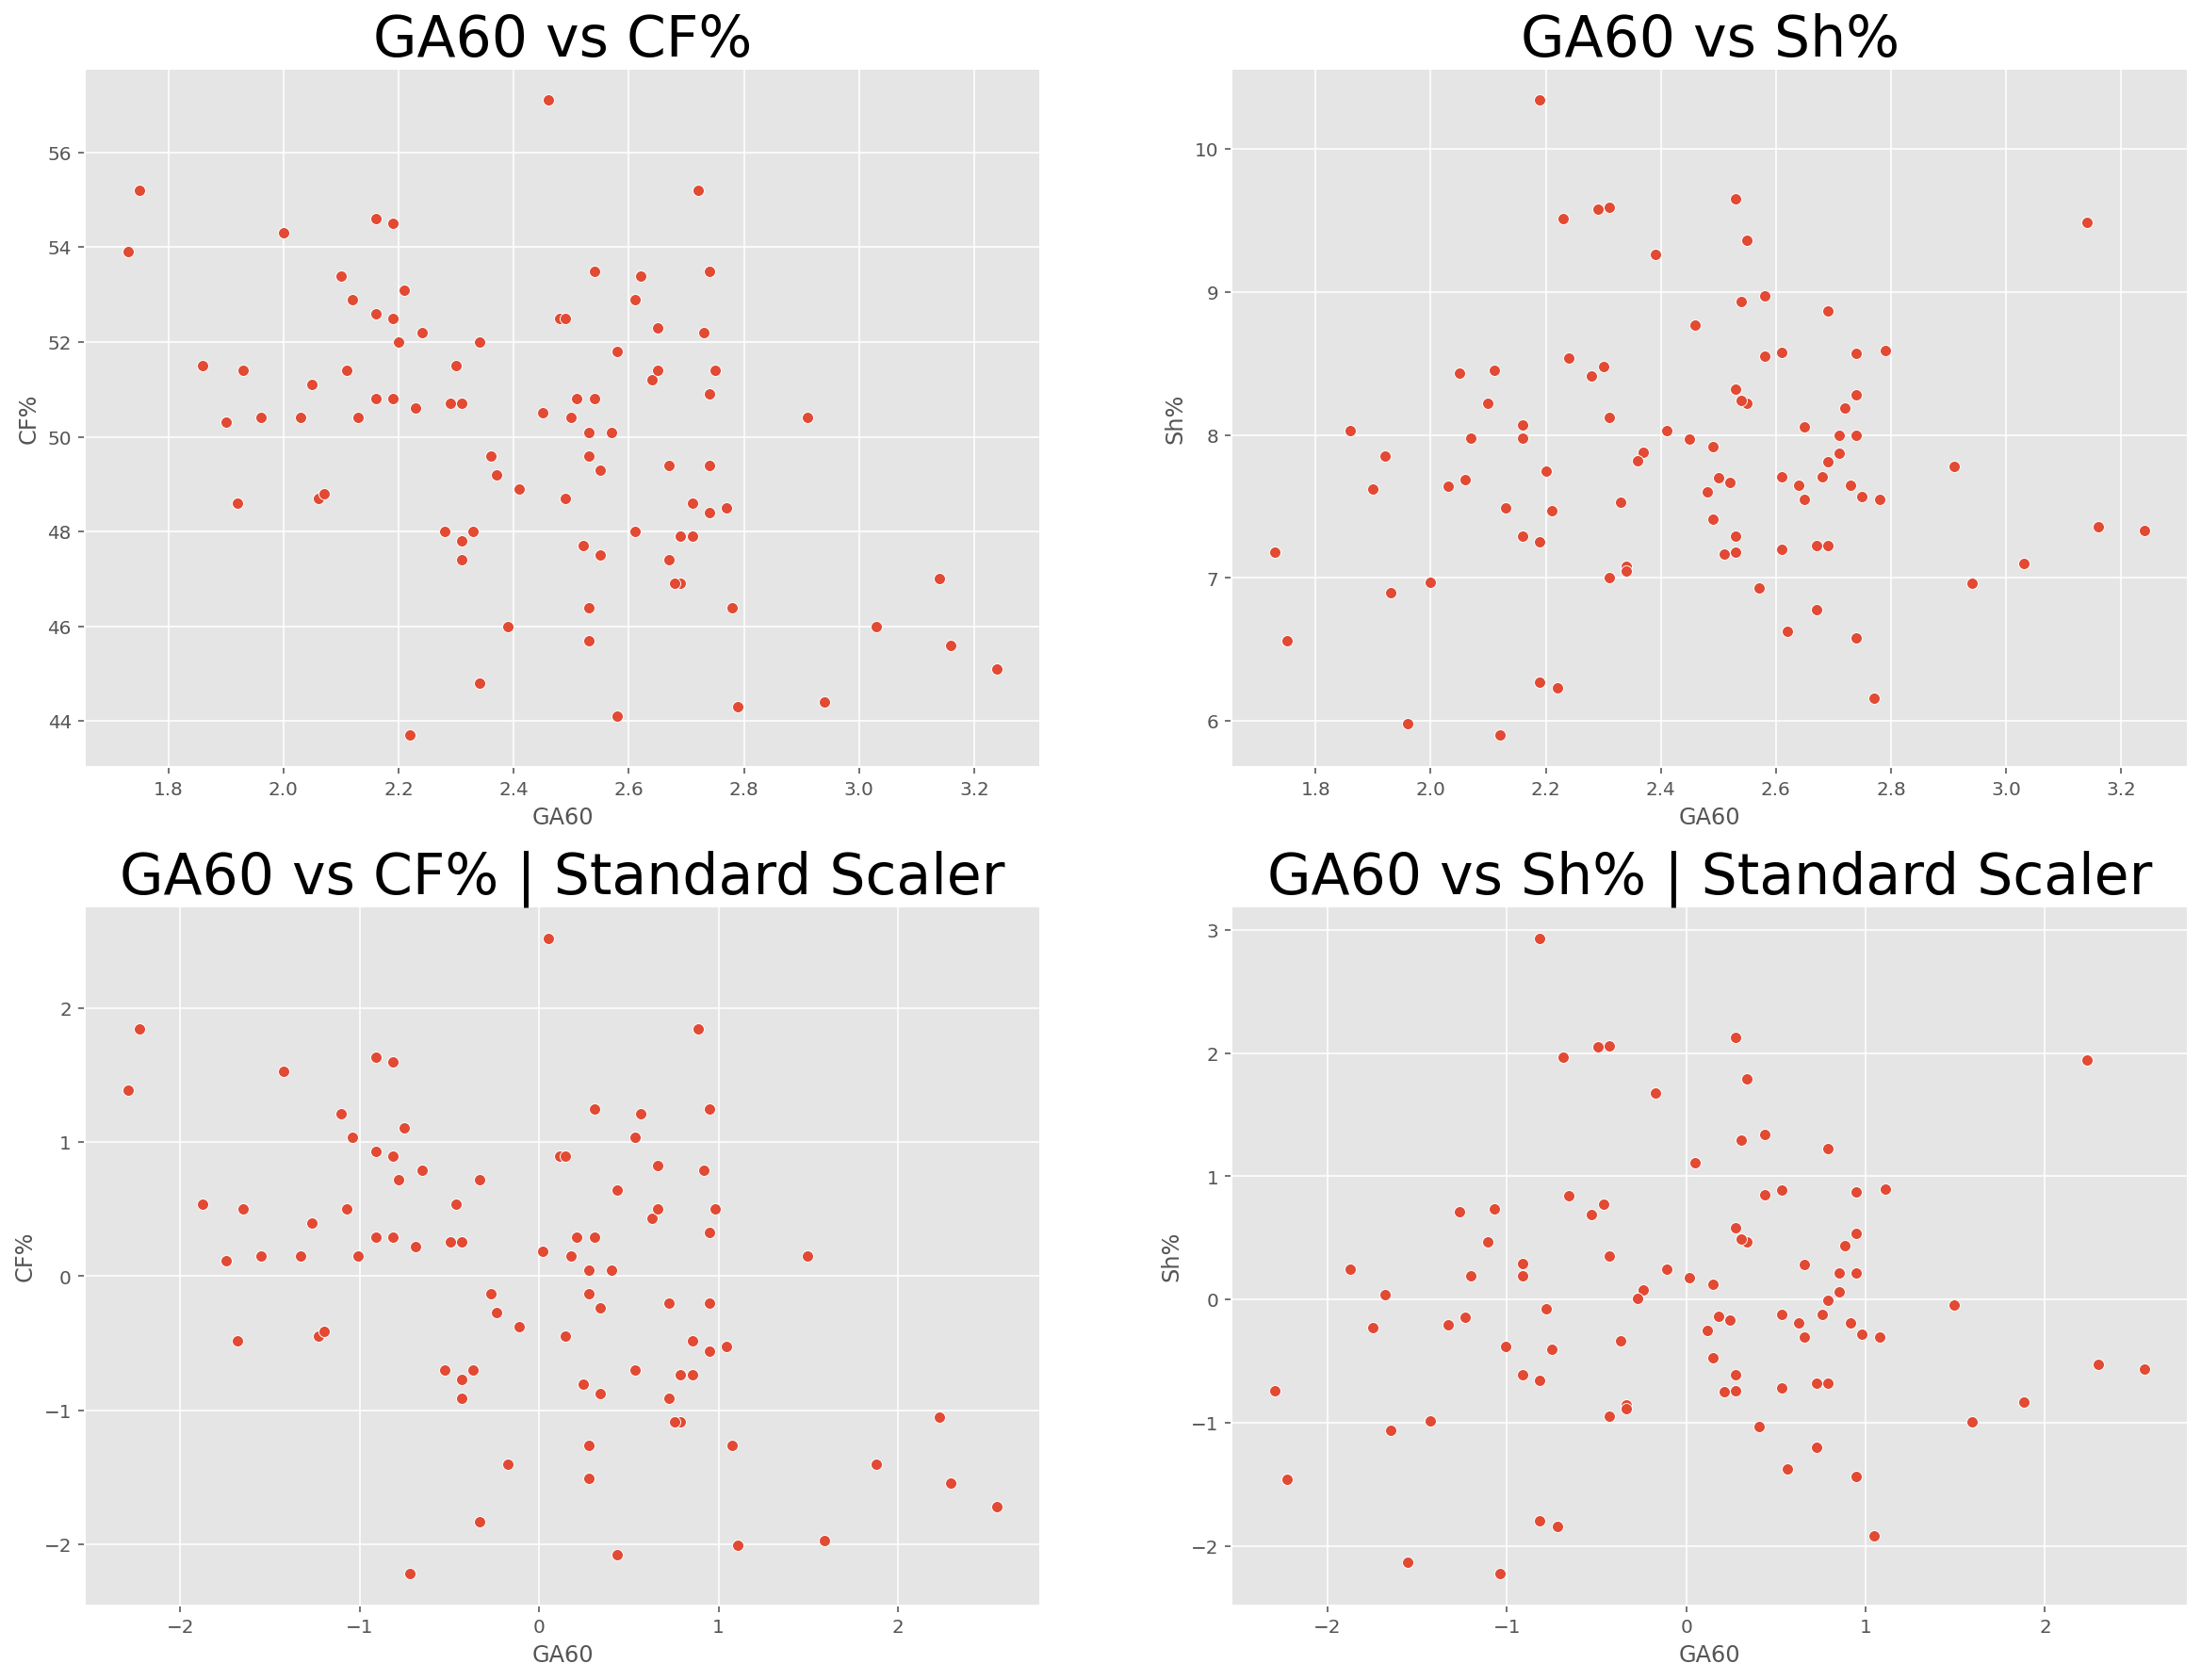

In [356]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.scatterplot(data=X, x='GA60', y='CF%')
plt.title('GA60 vs CF%', fontsize=30)
plt.subplot(2,2,2,)
sns.scatterplot(data=X, x='GA60', y='Sh%')
plt.title('GA60 vs Sh%', fontsize=30)

plt.subplot(2,2,3)
sns.scatterplot(data=X_ss, x='GA60', y='CF%')
plt.title('GA60 vs CF% | Standard Scaler', fontsize=30)
plt.subplot(2,2,4,)
sns.scatterplot(data=X_ss, x='GA60', y='Sh%')
plt.title('GA60 vs Sh% | Standard Scaler', fontsize=30)

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [7]:
# A:

In [375]:
dbs = DBSCAN(eps=5, min_samples=8)

In [376]:
dbs.fit(X_ss)

DBSCAN(eps=5, min_samples=8)

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [377]:
# A:

In [378]:
dbs.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

In [371]:
# Needless to say, my initial passed arguments were t e r r i b l e 

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [372]:
# A:

In [379]:
silhouette_score(X_ss, dbs.labels_)

0.280438121339216

In [ ]:
# big yikes

In [10]:
# A:

In [393]:
np.random.choice(range(1,100))

66

In [401]:
np.random.random() * 10 + np.random.choice(range(1,100))

47.70379179070757

In [420]:
np.nan

nan

In [ ]:
# Warning, a lot of stuff past this is me going crazy trying to optimize for silhouette score

In [534]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler
from sklearn.preprocessing import RobustScaler

In [535]:
random_trials = pd.Series()

<ipython-input-535-bce0550b8812>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  random_trials = pd.Series()


In [537]:
for i in list(range(5_000)):
    first_quantile = np.random.choice(np.arange(0, 0.5, 0.01))
    third_quantile = np.random.choice(np.arange(0.5, 1.0, 0.01))
    
    rs = RobustScaler(quantile_range=(first_quantile,third_quantile))
    X_ss = rs.fit_transform(X)
    
    eps = np.random.random() + np.random.choice((range(1,100)))
    min_samples = np.random.random() + np.random.choice(range(1,1000))
    
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(X_ss)
    #print(dbs.labels_)
    try:
        random_trials[dbs] = [silhouette_score(X_ss, dbs.labels_), eps, min_samples, first_quantile, third_quantile]
    except:
        random_trials[None] = np.nan
        
    random_trials = random_trials.dropna()

In [539]:
random_trials.sort_values(ascending=False).head(10)

DBSCAN(eps=91.50840576895965, min_samples=20.791684816282146)    [0.37877415974566725, 91.50840576895965, 20.79...
DBSCAN(eps=99.56840219618597, min_samples=5.418590497832646)     [0.3702459555847107, 99.56840219618597, 5.4185...
DBSCAN(eps=94.01465647218086, min_samples=4.224496312912595)     [0.3700798879213614, 94.01465647218086, 4.2244...
DBSCAN(eps=94.50609371826401, min_samples=5.610129551165038)     [0.3162213437735186, 94.50609371826401, 5.6101...
DBSCAN(eps=83.42579783647487, min_samples=2.384202708845562)     [0.31205901823099663, 83.42579783647487, 2.384...
DBSCAN(eps=98.42392785169739, min_samples=32.844558440317904)    [0.309544321509494, 98.42392785169739, 32.8445...
DBSCAN(eps=96.88631532293913, min_samples=26.885417853439165)    [0.30469820602125935, 96.88631532293913, 26.88...
DBSCAN(eps=91.00094466646111, min_samples=24.151039319103404)    [0.2629727106204369, 91.00094466646111, 24.151...
DBSCAN(eps=96.47213300864942, min_samples=6.1934336853685386)    [0.251456203924

In [544]:
pd.concat([pd.DataFrame([i[0] for i in random_trials.values], columns=['silhouette']).describe(), 
           pd.DataFrame([i[1] for i in random_trials.values], columns=['eps']).describe(),
           pd.DataFrame([i[2] for i in random_trials.values], columns=['min_samples']).describe(),
           pd.DataFrame([i[3] for i in random_trials.values], columns=['first_quantile']).describe(),
           pd.DataFrame([i[4] for i in random_trials.values], columns=['third_quantile']).describe()
          ], axis=1)

silhouette        eps  min_samples  first_quantile  third_quantile
count   26.000000  26.000000    26.000000       26.000000       26.000000
mean     0.128000  85.605701    15.166224        0.181154        0.868462
std      0.199189  13.776128    12.245337        0.153397        0.103138
min     -0.349588  41.479127     1.512236        0.000000        0.570000
25%      0.009911  83.925326     5.466475        0.070000        0.802500
50%      0.184016  91.146169    12.927045        0.125000        0.885000
75%      0.294267  94.030105    23.123931        0.290000        0.960000
max      0.378774  99.568402    49.900339        0.490000        0.980000

In [562]:
plotting_data = pd.DataFrame(data=list(random_trials.values), columns=['silhouette', 'eps', 'min_samples', 'first_quartile', 'third_quartile'])
plotting_data.head()

silhouette        eps  min_samples  first_quartile  third_quartile
0    0.262973  91.000945    24.151039            0.04            0.80
1   -0.132202  91.291393     3.217577            0.36            0.75
2    0.312059  83.425798     2.384203            0.28            0.98
3    0.251456  96.472133     6.193434            0.37            0.97
4   -0.093638  61.420634     9.861625            0.02            0.82

Text(0.5, 1.0, 'third quartile vs silhouette')

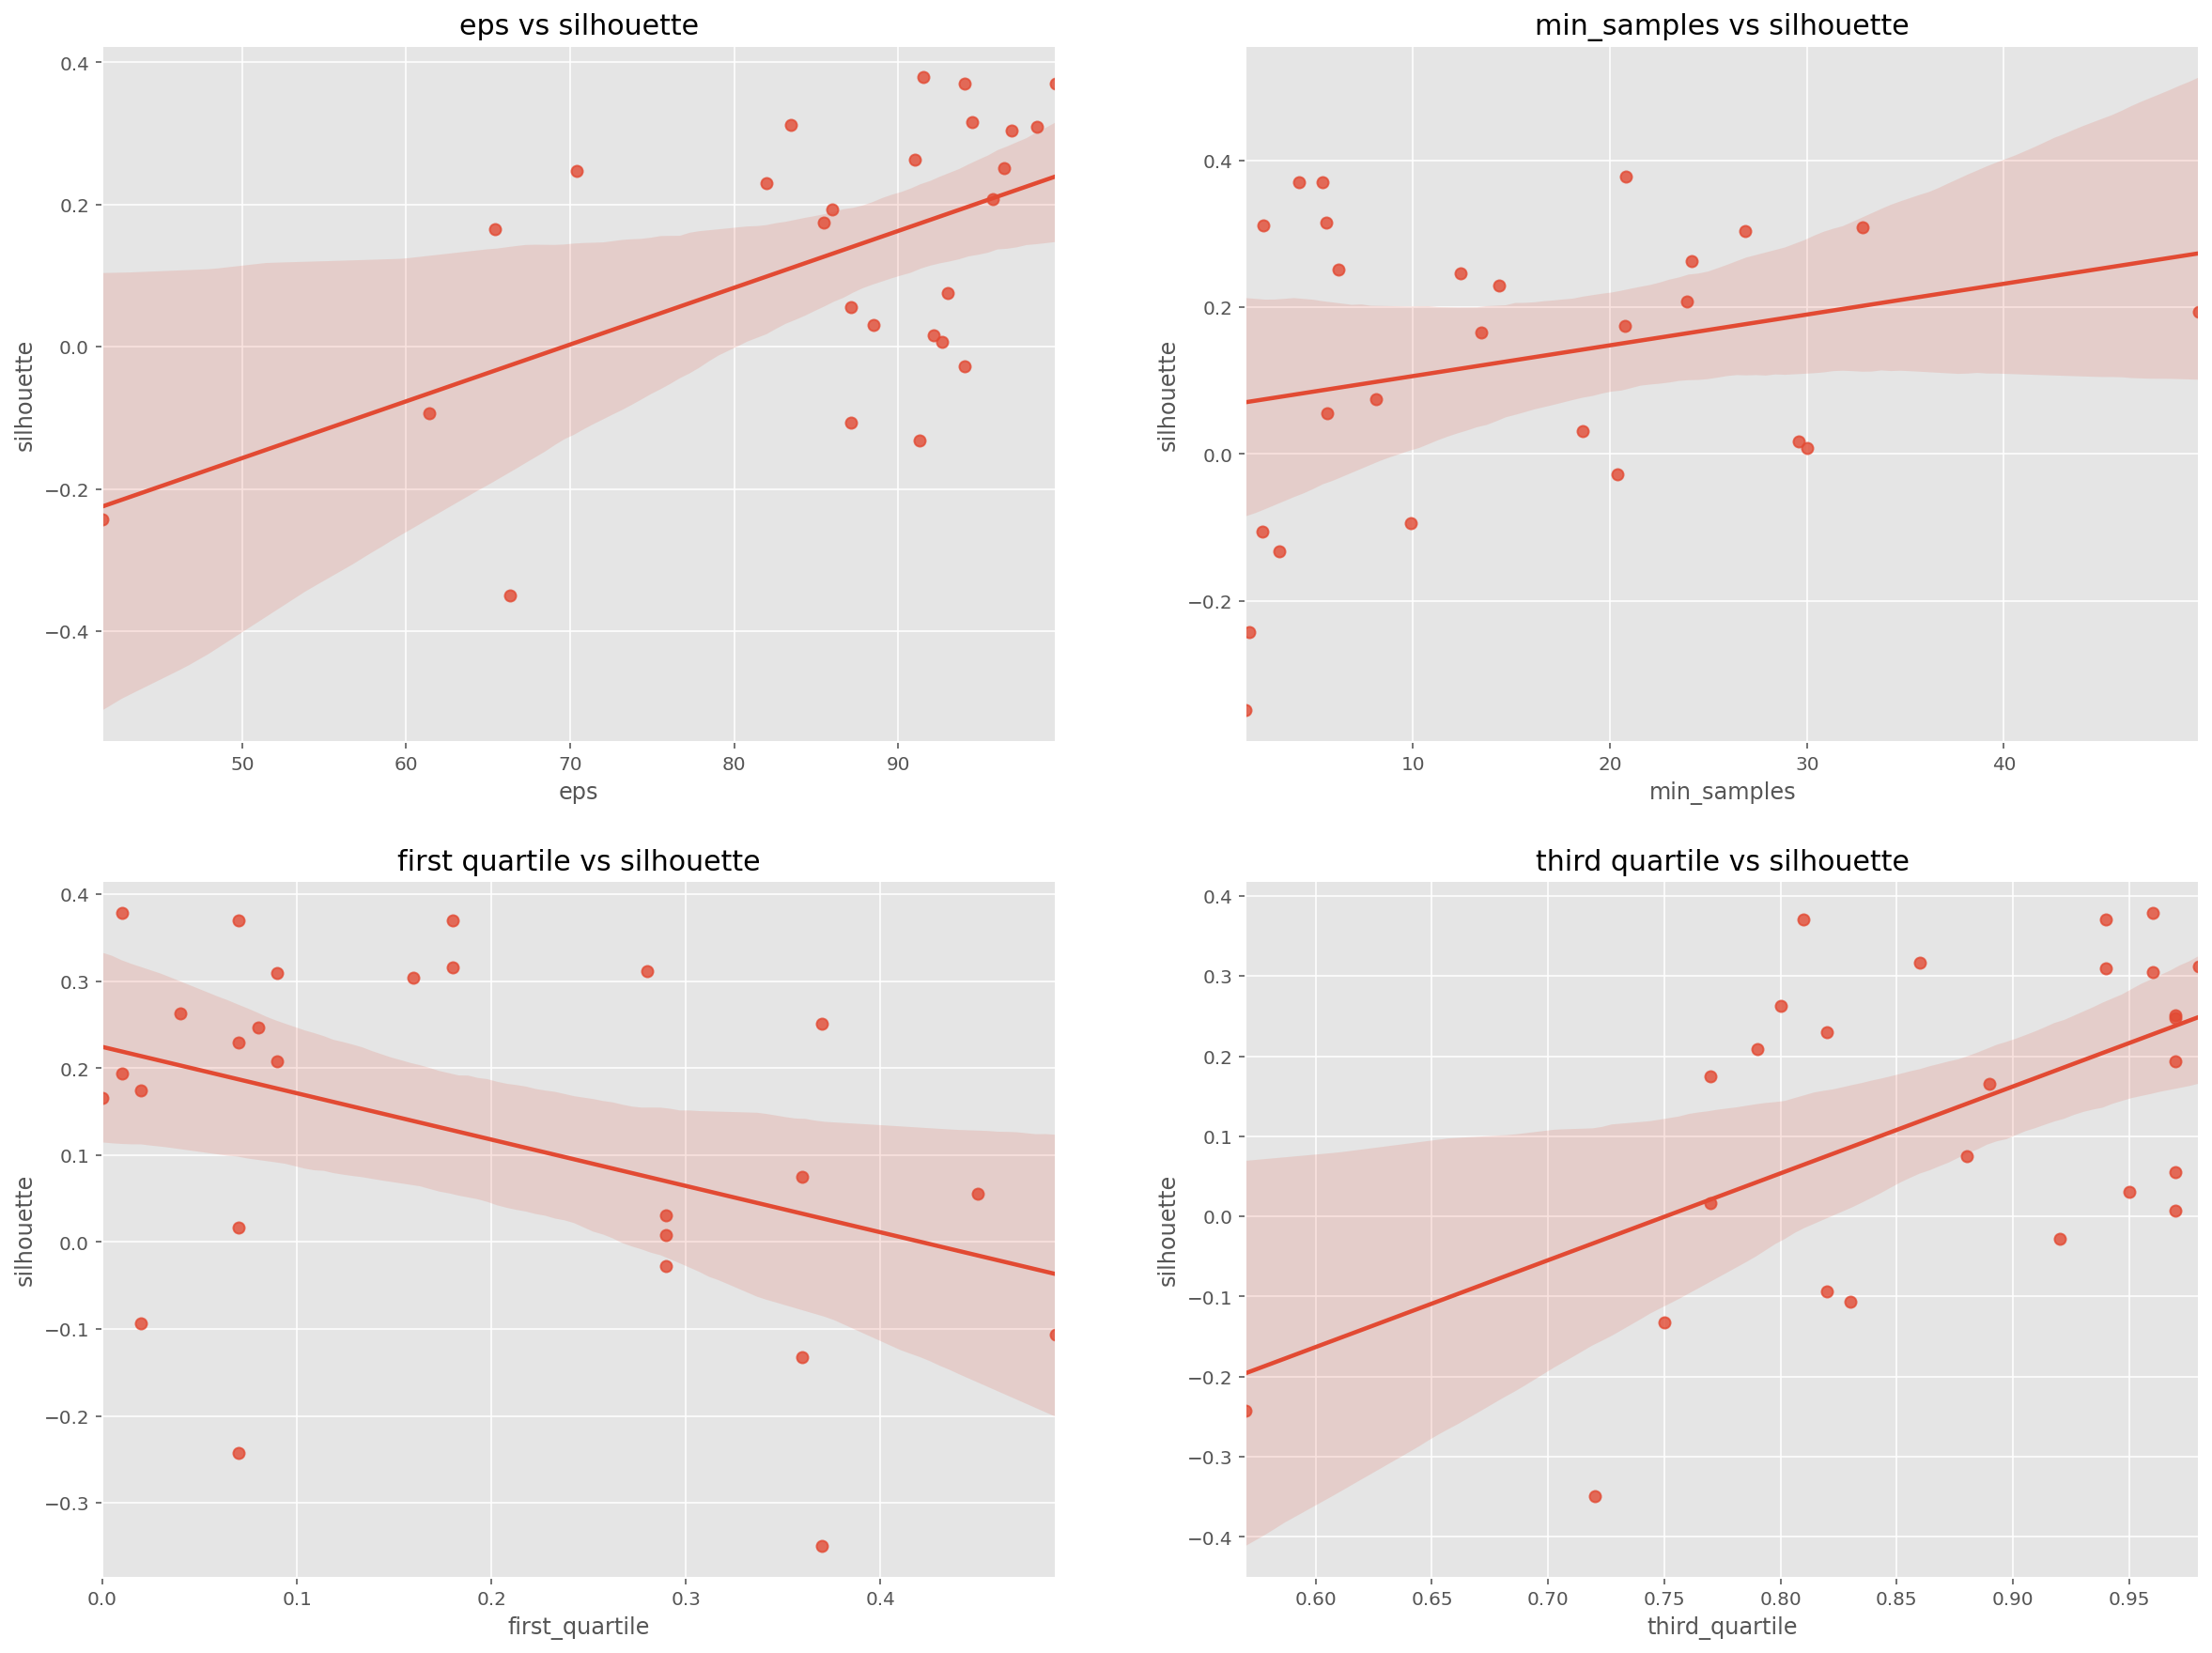

In [561]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.regplot(data=plotting_data, y='silhouette', x='eps')
plt.title('eps vs silhouette', fontsize=15)
plt.subplot(2, 2, 2)
sns.regplot(data=plotting_data, y='silhouette', x='min_samples')
plt.title('min_samples vs silhouette', fontsize=15)
plt.subplot(2, 2, 3)
sns.regplot(data=plotting_data, y='silhouette', x='first_quartile')
plt.title('first quartile vs silhouette', fontsize=15)
plt.subplot(2, 2, 4)
sns.regplot(data=plotting_data, y='silhouette', x='third_quartile')
plt.title('third quartile vs silhouette', fontsize=15)

In [543]:
# thanks to our random testing, we found a better random range our random sampling

In [565]:
random_trials_2 = pd.Series()

<ipython-input-565-03619e8a9107>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  random_trials_2 = pd.Series()


In [569]:
for i in list(range(5_000)):
    first_quantile = np.random.choice(np.arange(0, 0.2, 0.01)) # range is from 0 to 0.2
    third_quantile = np.random.choice(np.arange(0.8, 1.0, 0.01)) # range is from 0.8 to 1.0
    
    rs = RobustScaler(quantile_range=(first_quantile,third_quantile))
    X_ss = rs.fit_transform(X)
    
    eps = np.random.random() + np.random.choice((range(85,1000))) # range is from 85 to some upper bound
    min_samples = np.random.random() + np.random.choice(range(1,50)) # This one I'm actually going to reduce the range to the datapoints that exist
    
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(X_ss)
    #print(dbs.labels_)
    try:
        random_trials_2[dbs] = [silhouette_score(X_ss, dbs.labels_), eps, min_samples, first_quantile, third_quantile]
    except:
        random_trials_2[None] = np.nan
        
    random_trials_2 = random_trials_2.dropna()

In [570]:
plotting_data_2 = pd.DataFrame(data=list(random_trials_2.values), columns=['silhouette', 'eps', 'min_samples', 'first_quartile', 'third_quartile'])
plotting_data_2.head()

silhouette        eps  min_samples  first_quartile  third_quartile
0    0.287238  87.694898    27.974700            0.08            0.95
1    0.121269  95.627841    35.846735            0.08            0.85
2    0.310872  66.289339     5.402140            0.00            0.98
3    0.362250  89.215748    12.312536            0.00            0.89
4    0.352478  86.718885    13.634906            0.02            0.86

Text(0.5, 1.0, 'third quartile vs silhouette | 2')

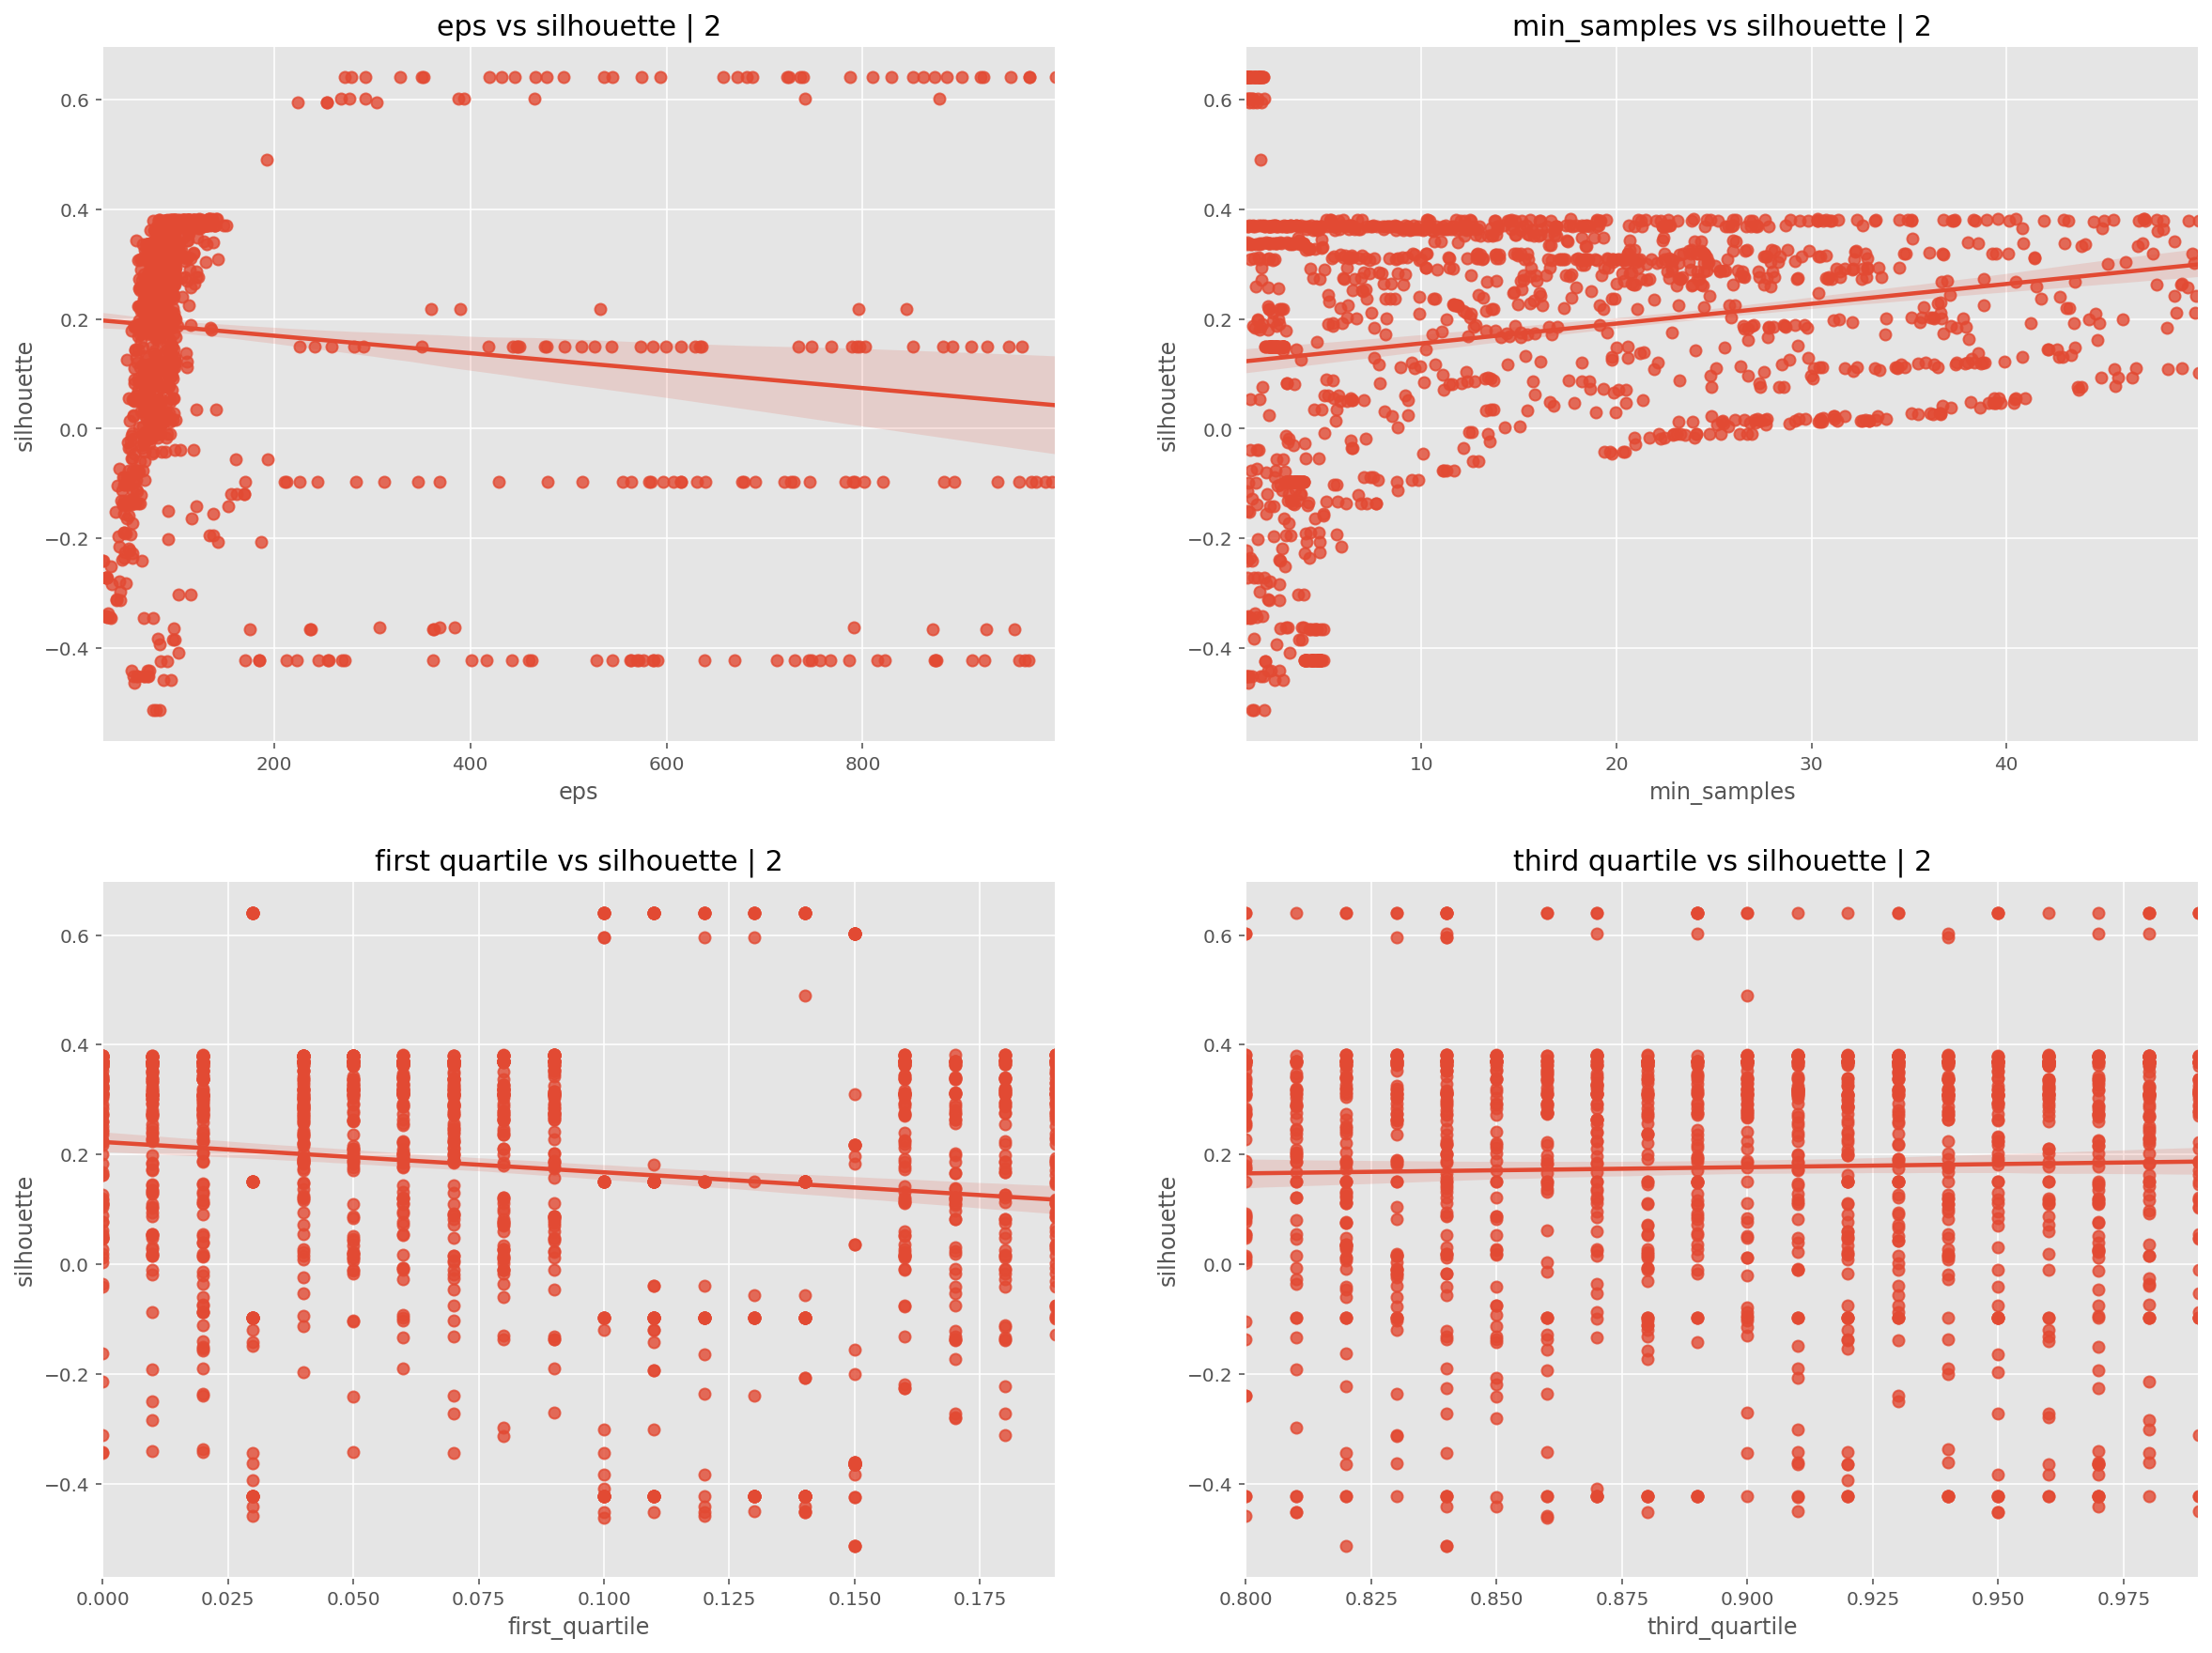

In [571]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.regplot(data=plotting_data_2, y='silhouette', x='eps')
plt.title('eps vs silhouette | 2', fontsize=15)
plt.subplot(2, 2, 2)
sns.regplot(data=plotting_data_2, y='silhouette', x='min_samples')
plt.title('min_samples vs silhouette | 2', fontsize=15)
plt.subplot(2, 2, 3)
sns.regplot(data=plotting_data_2, y='silhouette', x='first_quartile')
plt.title('first quartile vs silhouette | 2', fontsize=15)
plt.subplot(2, 2, 4)
sns.regplot(data=plotting_data_2, y='silhouette', x='third_quartile')
plt.title('third quartile vs silhouette | 2', fontsize=15)

In [576]:
plotting_data_2.loc[plotting_data_2['silhouette'] > 0.6].describe()

silhouette         eps  min_samples  first_quartile  third_quartile
count   46.000000   46.000000    46.000000       46.000000       46.000000
mean     0.633652  624.269402     1.417506        0.111304        0.893261
std      0.014734  235.016938     0.282485        0.038564        0.061718
min      0.601891  267.913940     1.021425        0.030000        0.800000
25%      0.640338  422.500253     1.167007        0.100000        0.840000
50%      0.640338  664.810010     1.392316        0.120000        0.890000
75%      0.640338  845.935847     1.644627        0.140000        0.950000
max      0.640338  996.327154     1.955937        0.150000        0.990000

In [577]:
# Alright, second iteration told us some interesting things and wow, I like the graphs that came out. Let's iterate even further using the ranges for what 
# worked the best for those silhouettes above 0.6.

# Remember, 1.0 is the best we can do 

In [578]:
random_trials_3 = pd.Series()

<ipython-input-578-41e2ac89446a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  random_trials_3 = pd.Series()


In [585]:
for i in list(range(5_000)):
    first_quantile = np.random.choice(np.arange(0, 0.15, 0.01)) # range is from 0 to 0.15
    third_quantile = np.random.choice(np.arange(0.8, 1.0, 0.01)) # range is from 0.8 to 1.0
    
    rs = RobustScaler(quantile_range=(first_quantile,third_quantile))
    X_ss = rs.fit_transform(X)
    
    eps = np.random.random() + np.random.choice((range(200,1000))) # range is from 85 to some upper bound
    min_samples = np.random.random() + np.random.choice(range(1,200)) # Let's make this one bigger again to identify larger trends
    
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(X_ss)
    #print(dbs.labels_)
    try:
        random_trials_3[dbs] = [silhouette_score(X_ss, dbs.labels_), eps, min_samples, first_quantile, third_quantile]
    except:
        random_trials_3[None] = np.nan
        
    random_trials_3 = random_trials_3.dropna()

In [586]:
plotting_data_3 = pd.DataFrame(data=list(random_trials_3.values), columns=['silhouette', 'eps', 'min_samples', 'first_quartile', 'third_quartile'])
plotting_data_3.head()

silhouette         eps  min_samples  first_quartile  third_quartile
0   -0.422809  949.933095     4.062884            0.14            0.92
1   -0.422809  599.411691     4.637480            0.12            0.83
2    0.595309  220.610243     1.635496            0.10            0.83
3    0.640338  959.111863     1.712887            0.03            0.89
4    0.640338  686.416113     1.895444            0.11            0.86

Text(0.5, 1.0, 'third quartile vs silhouette | 3')

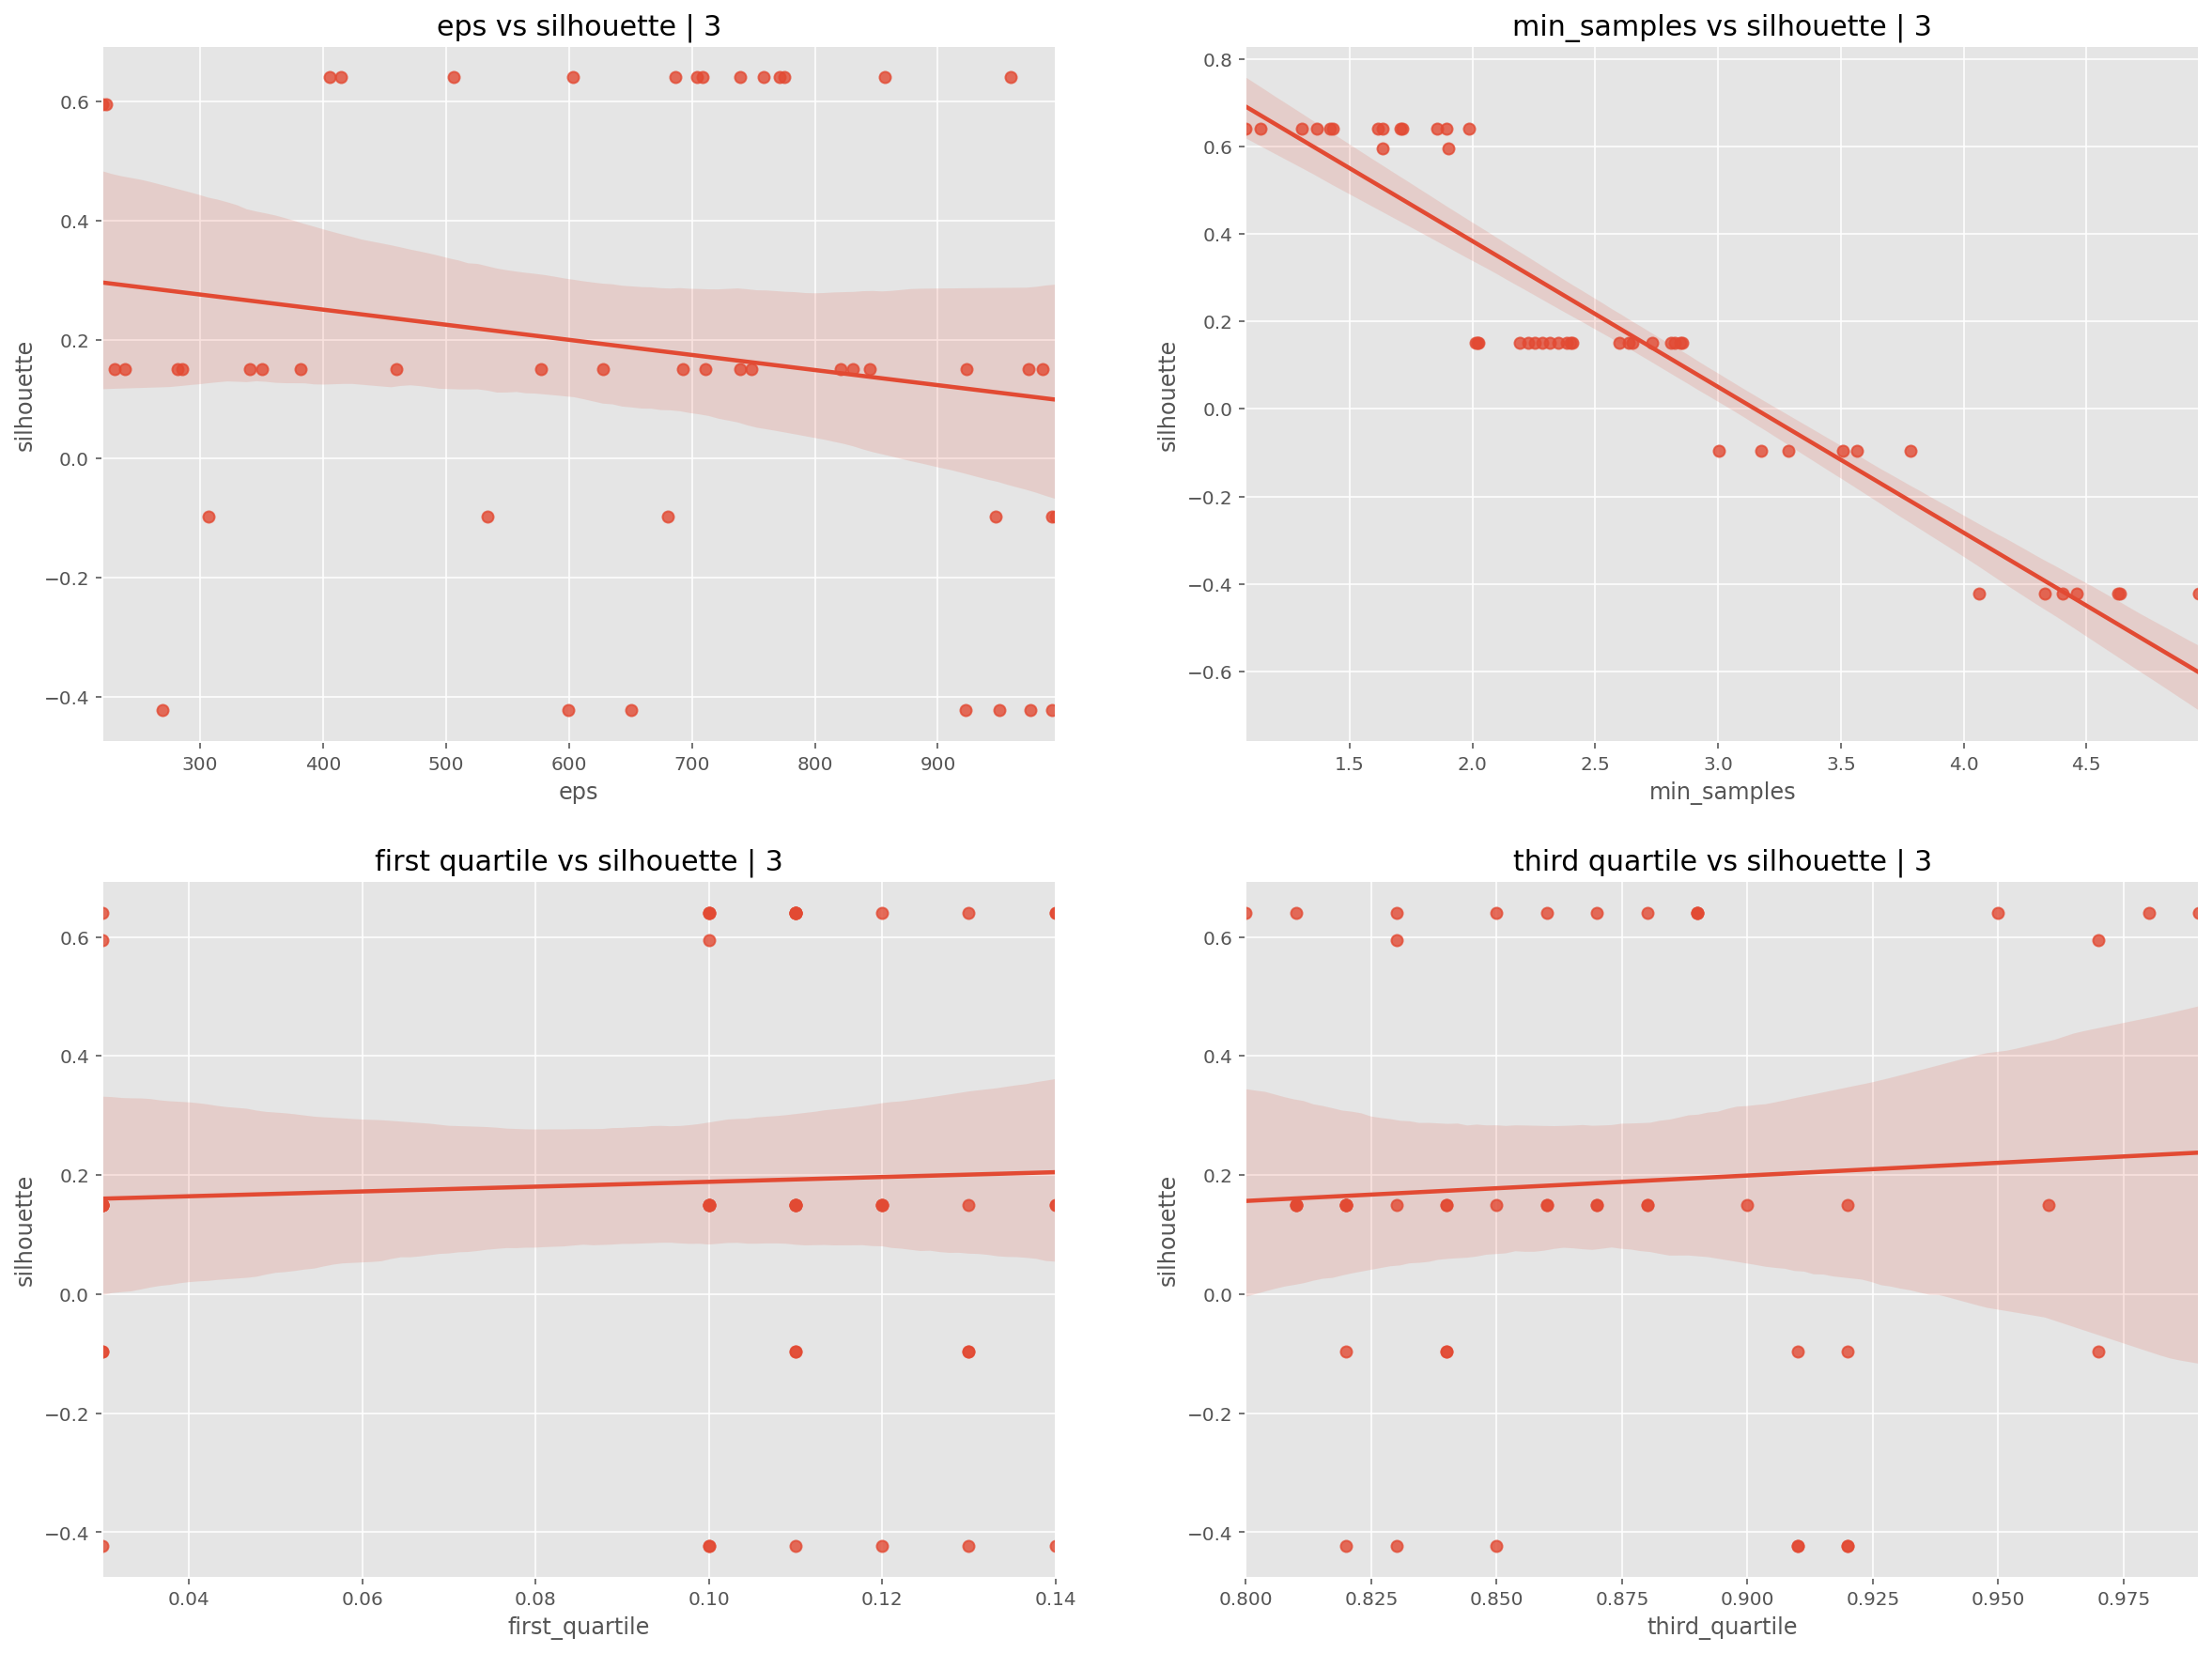

In [587]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.regplot(data=plotting_data_3, y='silhouette', x='eps')
plt.title('eps vs silhouette | 3', fontsize=15)
plt.subplot(2, 2, 2)
sns.regplot(data=plotting_data_3, y='silhouette', x='min_samples')
plt.title('min_samples vs silhouette | 3', fontsize=15)
plt.subplot(2, 2, 3)
sns.regplot(data=plotting_data_3, y='silhouette', x='first_quartile')
plt.title('first quartile vs silhouette | 3', fontsize=15)
plt.subplot(2, 2, 4)
sns.regplot(data=plotting_data_3, y='silhouette', x='third_quartile')
plt.title('third quartile vs silhouette | 3', fontsize=15)

In [ ]:
# Another iteration. I can zone in on min_samples with the upper range being around 2

In [588]:
random_trials_4 = pd.Series()

<ipython-input-588-b981bae45758>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  random_trials_4 = pd.Series()


In [592]:
for i in list(range(5_000)):
    # I don't know how to optimize this much further. There are clearly bands but it seems to depend on the other factors because we have 4
    # classifications of silhouette scores per quartile selection
    
    first_quantile = np.random.choice(np.arange(0, 0.15, 0.01)) # range is from 0 to 0.15
    third_quantile = np.random.choice(np.arange(0.8, 1.0, 0.01)) # range is from 0.8 to 1.0
    
    rs = RobustScaler(quantile_range=(first_quantile,third_quantile))
    X_ss = rs.fit_transform(X)
    
    eps = np.random.random() + np.random.choice((range(400,3000))) # range is from 400 to some upper bound, let's see if it does anything
    min_samples = np.random.random() + np.random.choice(range(1, 2)) # Let's make this one bigger again to identify larger trends
    
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(X_ss)
    #print(dbs.labels_)
    try:
        random_trials_4[dbs] = [silhouette_score(X_ss, dbs.labels_), eps, min_samples, first_quantile, third_quantile]
    except:
        random_trials_4[None] = np.nan
        
    random_trials_4 = random_trials_4.dropna()

In [593]:
plotting_data_4 = pd.DataFrame(data=list(random_trials_4.values), columns=['silhouette', 'eps', 'min_samples', 'first_quartile', 'third_quartile'])
plotting_data_4.head()

silhouette          eps  min_samples  first_quartile  third_quartile
0    0.640338  3987.802525     1.327406            0.11            0.85
1    0.640338   771.041154     1.819367            0.12            0.87
2    0.640338  3202.247018     1.983759            0.14            0.95
3    0.640338  4352.331707     1.374044            0.10            0.80
4    0.640338  4825.808767     1.330295            0.13            0.93

In [606]:
plotting_data_4.loc[plotting_data_4['silhouette'] > 0.64].sort_values(by='silhouette', ascending=False)

silhouette          eps  min_samples  first_quartile  third_quartile
0       0.640338  3987.802525     1.327406            0.11            0.85
2705    0.640338  2859.148002     1.728696            0.14            0.88
2692    0.640338  1701.612397     1.094100            0.11            0.95
2693    0.640338  1482.384869     1.750224            0.10            0.92
2694    0.640338  2483.398984     1.667520            0.11            0.90
...          ...          ...          ...             ...             ...
1354    0.640338  3036.677791     1.460793            0.10            0.96
1355    0.640338  4196.878111     1.916141            0.13            0.98
1356    0.640338  1180.552433     1.336727            0.11            0.91
1357    0.640338  4340.172248     1.852167            0.03            0.83
4049    0.640338  1587.536795     1.024372            0.12            0.90

[4050 rows x 5 columns]

Text(0.5, 1.0, 'third quartile vs silhouette | 4')

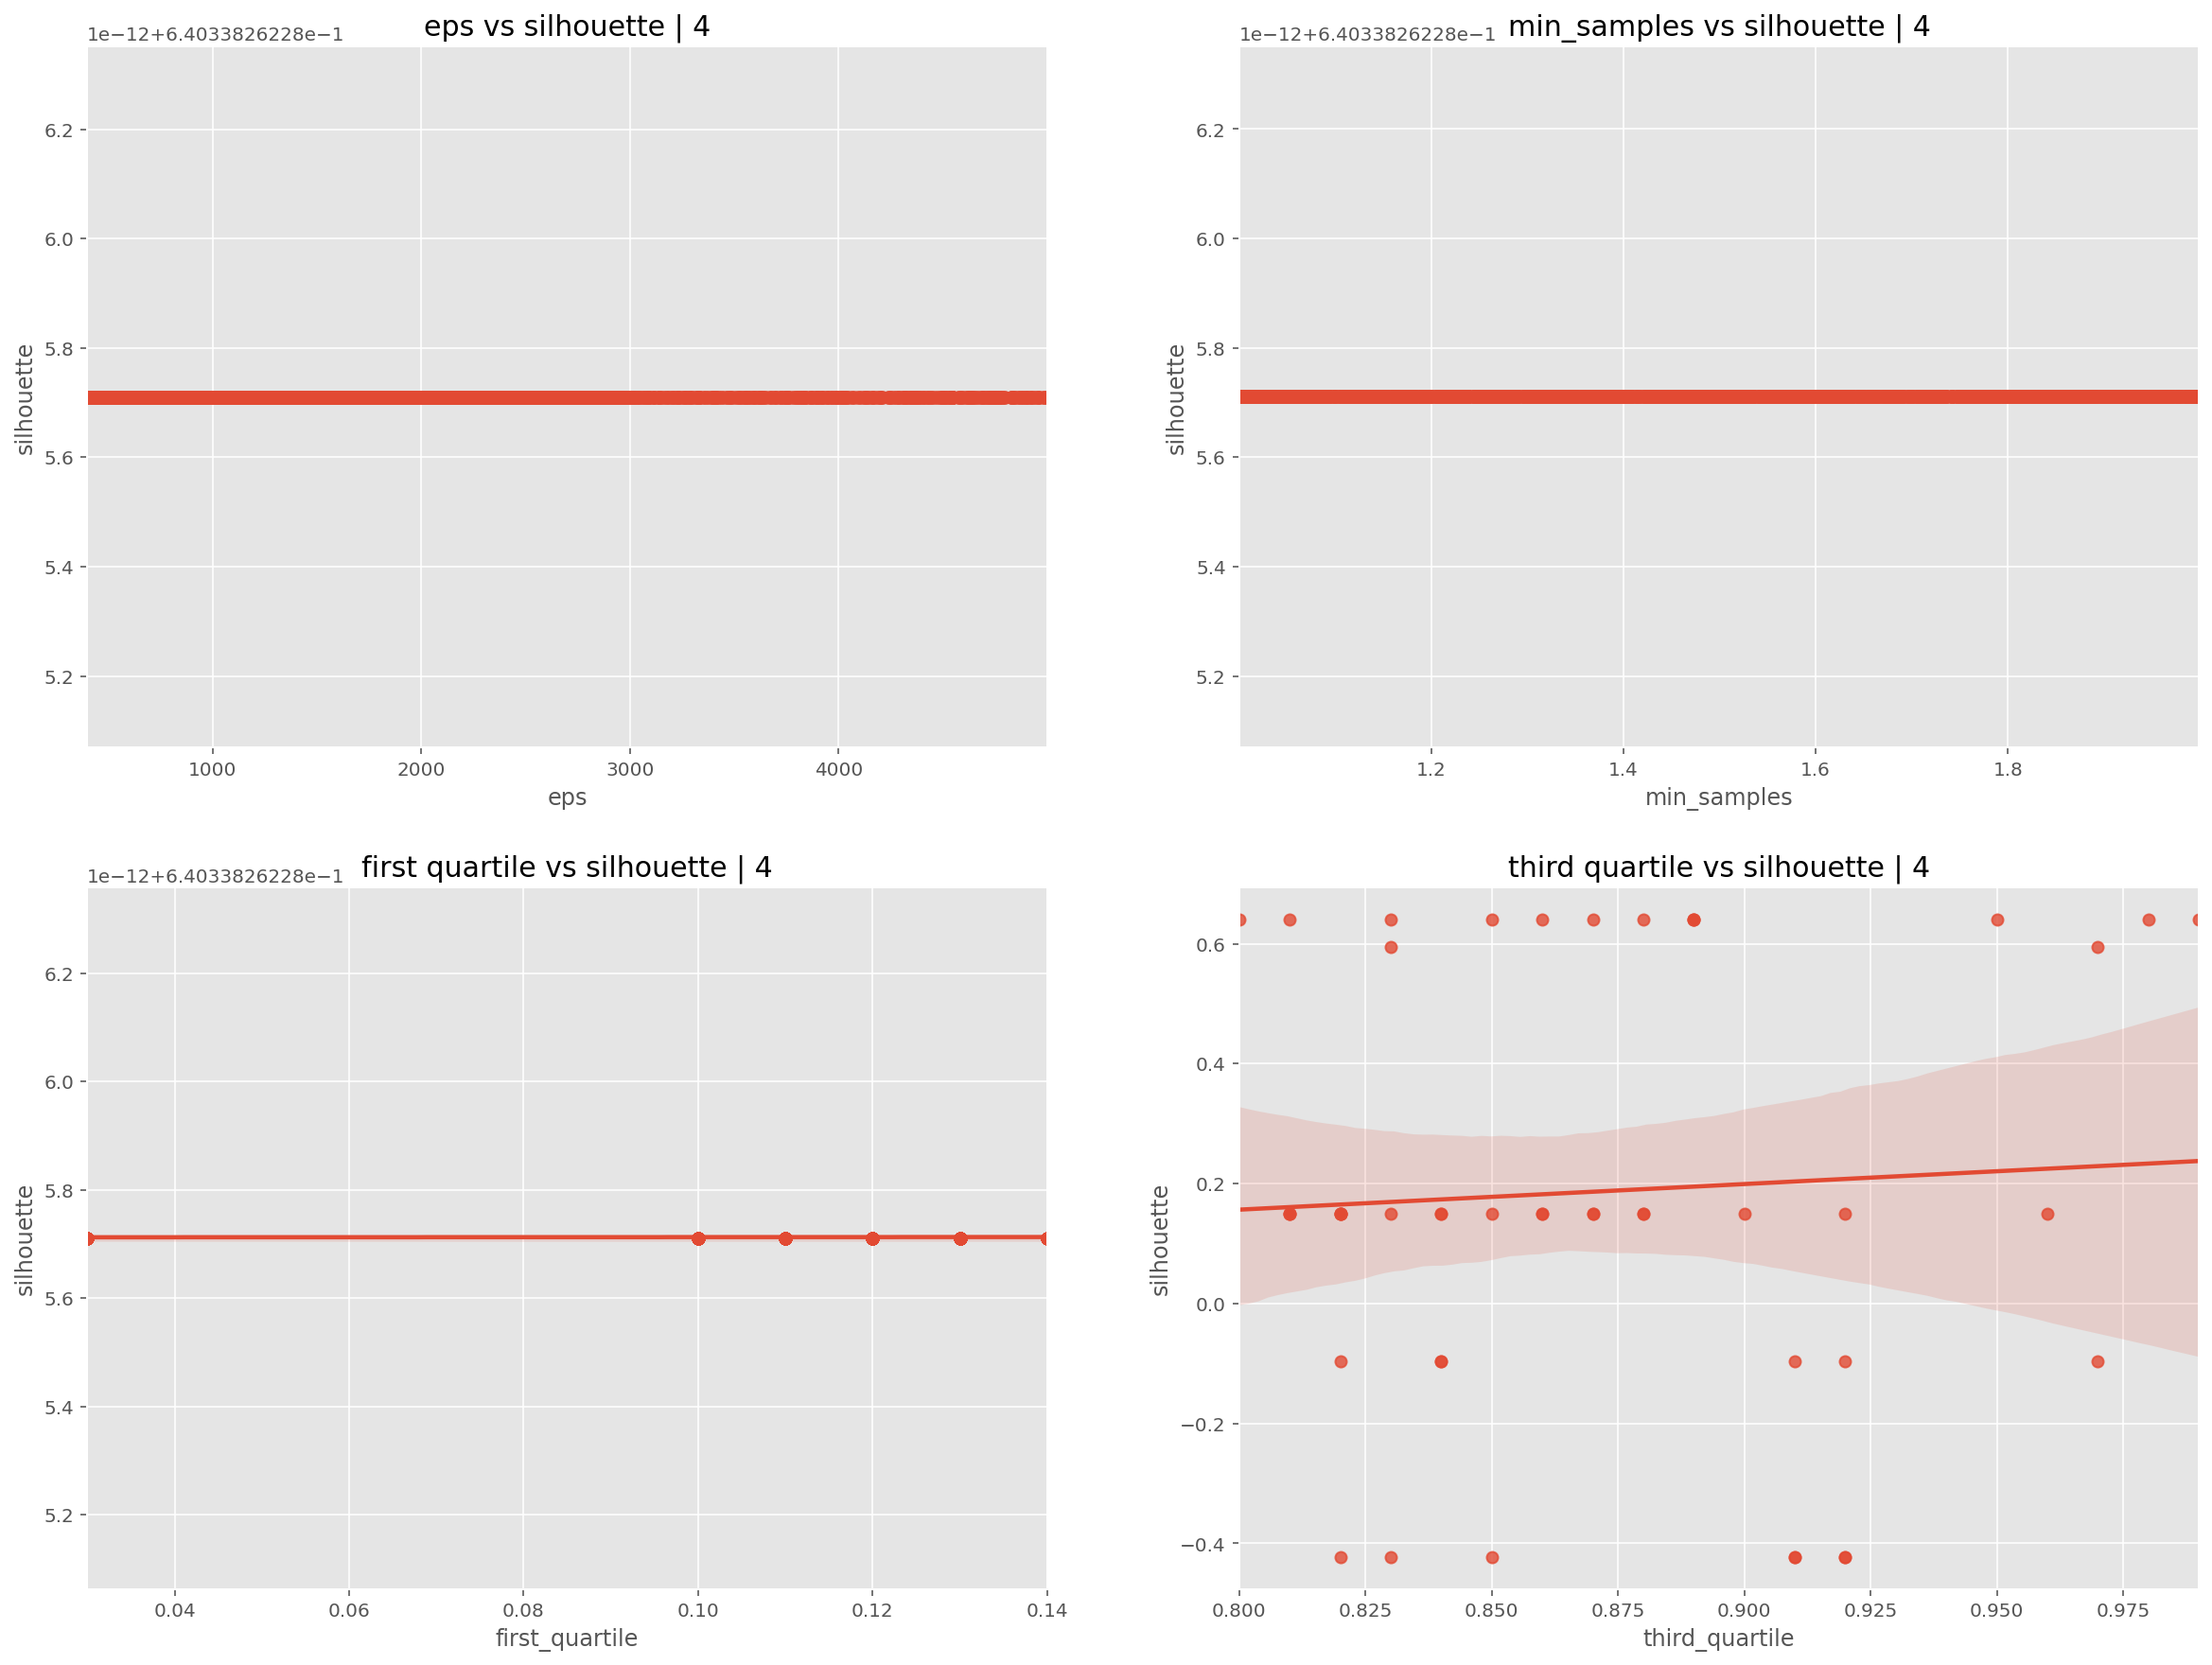

In [594]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.regplot(data=plotting_data_4, y='silhouette', x='eps')
plt.title('eps vs silhouette | 4', fontsize=15)
plt.subplot(2, 2, 2)
sns.regplot(data=plotting_data_4, y='silhouette', x='min_samples')
plt.title('min_samples vs silhouette | 4', fontsize=15)
plt.subplot(2, 2, 3)
sns.regplot(data=plotting_data_4, y='silhouette', x='first_quartile')
plt.title('first quartile vs silhouette | 4', fontsize=15)
plt.subplot(2, 2, 4)
sns.regplot(data=plotting_data_3, y='silhouette', x='third_quartile')
plt.title('third quartile vs silhouette | 4', fontsize=15)

In [ ]:
# Honestly, I think I found the upper limit of how high the silhouette score can go
# This is the parameters for our best DBSCAN model
# 

In [607]:
plotting_data_4.loc[plotting_data_4['silhouette'] > 0.64].sort_values(by='silhouette', ascending=False).head(1)

silhouette          eps  min_samples  first_quartile  third_quartile
0    0.640338  3987.802525     1.327406            0.11            0.85

In [621]:
random_trials_4.keys()[0], random_trials_4.values[0]

(DBSCAN(eps=3987.8025252945154, min_samples=1.3274062964201567),
 [0.6403382622857104,
  3987.8025252945154,
  1.3274062964201567,
  0.11,
  0.8500000000000001])

In [624]:
best_db = random_trials_4.keys()[0]

rs = RobustScaler(quantile_range=(0.11, 0.8500000000000001))
X_ss = rs.fit_transform(X)

In [627]:
best_db_data_scaled = pd.DataFrame(X_ss, columns=X.columns, index=X.index)

### 8. Plot the clusters

You can choose any two variables for the axes.

In [11]:
# A:

In [628]:
best_db_data_scaled.columns

Index(['PTS', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF', 'SA', 'SF60',
       'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF', 'CA', 'CF60',
       'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

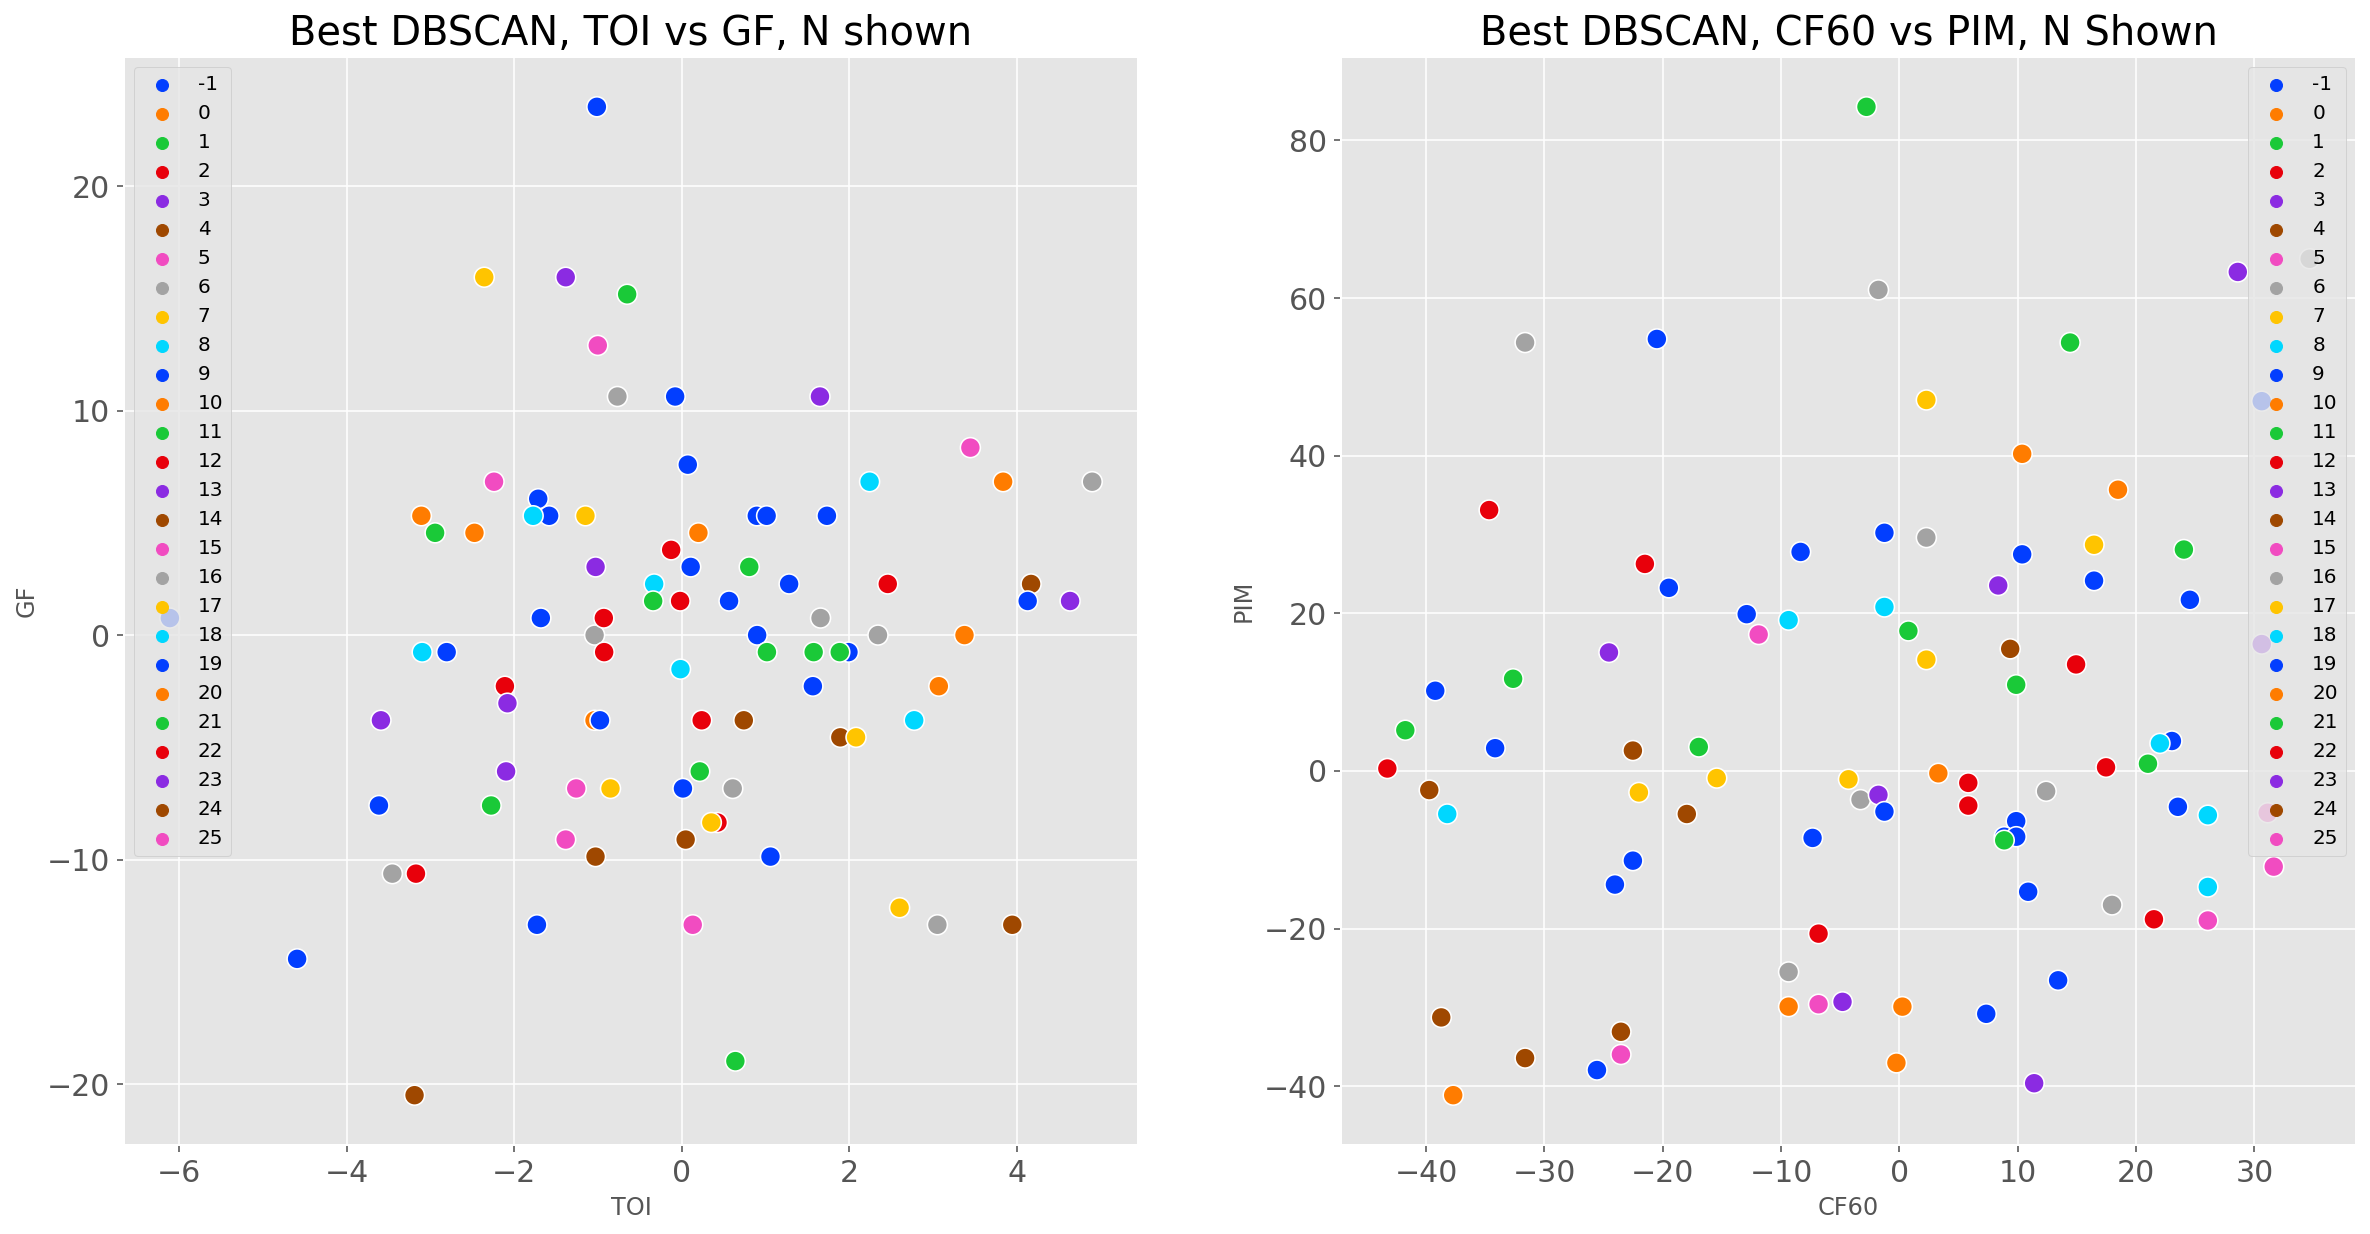

In [656]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.scatterplot(x=best_db_data_scaled['TOI'], y=best_db_data_scaled['GF'], hue=best_db.labels_, palette='bright', s=100)
plt.title('Best DBSCAN, TOI vs GF, N shown', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.subplot(1,2,2)
sns.scatterplot(x=best_db_data_scaled['CF60'], y=best_db_data_scaled['PIM'], hue=best_db.labels_, palette='bright', s=100)
plt.title('Best DBSCAN, CF60 vs PIM, N Shown', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [657]:
# Although this is the best preforming one, honestly 25 classes is a lot of classes and it becomes hard to make meaning 
# Honestly, this is just as good as looking at the graph without markings. These don't add value to the figure

### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

In [660]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=10_000, noise=0.5, factor=0.5)

In [661]:
circles_X

array([[-0.47820939, -0.41873991],
       [-0.91752691,  0.87345066],
       [-0.24507737, -1.06787261],
       ...,
       [ 0.94608687, -0.54640924],
       [ 1.16560723,  0.1815243 ],
       [ 0.0398923 ,  1.34800438]])

In [664]:
circles_y

array([0, 0, 0, ..., 1, 0, 0])

**9.2 Scale the data and fit DBSCAN on it.**

In [13]:
# A:

**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

In [14]:
# A: